# Proyecto Final: Problema de Regresi√≥n
## *Quality Prediction in a Mining Process*
## *Caso de estudio: Flotaci√≥n inversa de hierro (recuperaci√≥n de hierro y separaci√≥n de impurezas SiO‚ÇÇ)*

### Descripci√≥n del proceso y definiciones 
Una planta de flotaci√≥n utiliza la *flotaci√≥n por espuma*, un proceso de separaci√≥n fisicoqu√≠mica, para **concentrar minerales valiosos a partir de  la mena "ore" (concentraci√≥n de minerales de los cu√°les se pueden extraer sustancias valiosas de las cu√°les se pueden obtener ganancias)**. 

El proceso de separaci√≥n sigue la siguiente secuencia:
1. El mineral se muele hasta formar una pulpa.
2. La pulpa se mezcla con reactivos qu√≠micos (colectores, espumantes y modificadores) para hacer que los minerales deseados se vuelvan hidrof√≥bicos (repelentes al agua), mientras que los dem√°s permanecen hidrof√≠licos (atra√≠dos por el agua).
3. Se introduce aireaci√≥n, lo que provoca que las part√≠culas hidrof√≥bicas se adhieran a las burbujas de aire y asciendan a la superficie, formando una espuma valiosa que se recolecta. El material residual, conocido como relaves, se deposita en el fondo de la celda de flotaci√≥n.

### Contexto del dataset
Este es un dataset proveniente de una **planta industrial real**, del sector minero. La recolecci√≥n de los datos proviene de una **planta de flotaci√≥n**.

*Objetivo:* Utilizar los datos para **predecir la cantidad de impurezas en el concentrado de mineral**. Como esta impureza se mide cada hora, si se logra predecir cu√°nta **s√≠lice (impureza)** hay en el concentrado, podemos brindar a los ingenieros informaci√≥n anticipada para que tomen decisiones. As√≠, podr√°n aplicar acciones correctivas con antelaci√≥n (reducir impurezas, si es el caso) y tambi√©n contribuir al cuidado del medio ambiente (al reducir la cantidad de mineral que va a relaves, al disminuir la s√≠lice en el mineral concentrado).

### Contenido
- La primera columna muestra el rango de fecha y hora (desde marzo de 2017 hasta septiembre de 2017). Algunas columnas fueron muestreadas cada 20 segundos, otras cada hora.
- Las columnas segunda y tercera contienen medidas de calidad de la pulpa de mineral de hierro justo antes de ser alimentada a la planta de flotaci√≥n.
- De la columna 4 a la 8 se encuentran las variables m√°s importantes que afectan la calidad del mineral al final del proceso.
- De la columna 9 a la 22 se presentan datos del proceso (nivel y flujo de aire dentro de las columnas de flotaci√≥n), que tambi√©n impactan en la calidad del mineral.
- Las dos √∫ltimas columnas son mediciones de calidad final de la pulpa de mineral de hierro tomadas en laboratorio.

### Objetivo general 
Explorar la data real industrial y ayudar a las industrias de manufactura a mejorar su efiencia.

### Objetivo especif√≠co 
Predecir el porcentaje de s√≠lice en el concentrado de mineral de hierro.

*Revisar si es posible resolver las siguientes preguntas*

- ¬øEs posible predecir el porcentaje de s√≠lice en el concentrado cada minuto?
- ¬øCu√°ntos pasos (horas) hacia adelante se puede predecir el porcentaje de s√≠lice en el concentrado? Esto ayudar√≠a a los ingenieros a actuar de forma predictiva y optimizada, mitigando el porcentaje de hierro que podr√≠a ir a relaves.
- ¬øEs posible predecir el porcentaje de s√≠lice en el concentrado sin utilizar la columna de porcentaje de hierro en el concentrado (ya que est√°n altamente correlacionadas)?

### üìö Investigaciones relacionadas con este conjunto de datos
Art√≠culos de investigaci√≥n, conferencias y tesis de maestr√≠a:

- Predicci√≥n de purezas en una planta de flotaci√≥n por espuma industrial: t√©cnicas de aprendizaje profundo
- Sensor suave: aprendizaje autom√°tico tradicional o aprendizaje profundo
- Predicci√≥n de calidad basada en aprendizaje autom√°tico en el proceso de flotaci√≥n por espuma en miner√≠a

### *Representaci√≥n del Recuperamiento de Silice en una columna de flotaci√≥n*
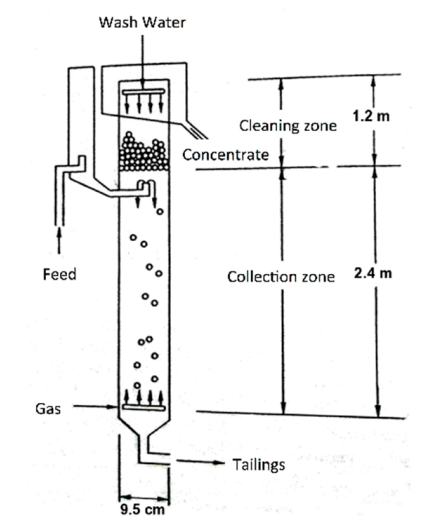

*Tomado de:* **Salinas-Rodr√≠guez, E., Flores-Badillo, J., Hern√°ndez-√Åvila, J., Cerecedo-S√°enz, E., Guti√©rrez-Amador, M. del P., Jeldres, R. I., & Toro, N.** (2020). *Assessment of silica recovery from metallurgical mining waste, by means of column flotation*. Metals, 10(1), 72. https://doi.org/10.3390/met10010072

### Importar librerias 

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

### Cargar el dataset

In [21]:
MinProcess_Flot_Plant = pd.read_csv("C:/Users/THINKBOOK/Documents/1. ESTUDIOS y FORMACIONES/PROGRAMMING/Data Science/Desarrollos de las clases/Proyecto Final/MiningProcess_Flotation_Plant.csv")
MinProcess_Flot_Plant.head()

date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
0  2017-03-10 01:00:00        55,2         16,98     3019,53    557,434   
1  2017-03-10 01:00:00        55,2         16,98     3024,41    563,965   
2  2017-03-10 01:00:00        55,2         16,98     3043,46    568,054   
3  2017-03-10 01:00:00        55,2         16,98     3047,36    568,665   
4  2017-03-10 01:00:00        55,2         16,98     3033,69    558,167   

  Ore Pulp Flow Ore Pulp pH Ore Pulp Density Flotation Column 01 Air Flow  \
0       395,713     10,0664             1,74                      249,214   
1       397,383     10,0672             1,74                      249,719   
2       399,668      10,068             1,74                      249,741   
3       397,939     10,0689             1,74                      249,917   
4       400,254     10,0697             1,74                      250,203   

  Flotation Column 02 Air Flow  ... Flotation Column 07 Air Flow  \
0                      253,235  ...                      250,884   
1                      250,532  ...                      248,994   
2                      247,874  ...                      248,071   
3                      254,487  ...                      251,147   
4                      252,136  ...                      248,928   

  Flotation Column 01 Level Flotation Column 02 Level  \
0                   457,396                   432,962   
1                   451,891                    429,56   
2                    451,24                   468,927   
3                   452,441                   458,165   
4                   452,441                     452,9   

  Flotation Column 03 Level Flotation Column 04 Level  \
0                   424,954                   443,558   
1                   432,939                   448,086   
2                    434,61                   449,688   
3                   442,865                    446,21   
4                   450,523                    453,67   

  Flotation Column 05 Level Flotation Column 06 Level  \
0                   502,255                    446,37   
1                   496,363                   445,922   
2                   484,411                   447,826   
3                   471,411                    437,69   
4                   462,598                   443,682   

  Flotation Column 07 Level % Iron Concentrate % Silica Concentrate  
0                   523,344              66,91                 1,31  
1                   498,075              66,91                 1,31  
2                   458,567              66,91                 1,31  
3                   427,669              66,91                 1,31  
4                   425,679              66,91                 1,31  

[5 rows x 24 columns]

## Descripci√≥n de las variables
### *Variables de tiempo (Rol en el proceso: Referencia temporal)*
|Variable|Significado|An√°lisis posible|
|--------|-----------|----------------|
|*date_time*|Fecha y hora de cada registro|Series temporales, patrones c√≠clicos, estabilidad operativa|

### *Variables de alimentaci√≥n (Rol en el proceso: Entrada)*
|Variable|Significado|An√°lisis posible|
|--------|-----------|----------------|
|*% Iron Feed*|Porcentaje de hierro en la alimentaci√≥n|Calidad del mineral, correlaci√≥n con rendimiento|
|*% Silica Feed*|Porcentaje de s√≠lice en la alimentaci√≥n|Impurezas iniciales, impacto en eficiencia|
|*Ore Pulp Flow*|Flujo volum√©trico de la pulpa del mineral|Balance de masa, sobrecarga o subalimentaci√≥n|
|*Ore Pulp pH*|pH de la pulpa del mineral|Influencia en flotaci√≥n, ajuste de reactivos|
|*Ore Pulp Density*|Densidad de la pulpa del mineral|Consistencia del material, eficiencia de separaci√≥n|

### *Dosificaci√≥n de reactivos (Rol en el proceso: Control)*
|Variable|Significado|An√°lisis posible|
|--------|-----------|----------------|
|*Starch Flow*|Flujo de almid√≥n (depresor)|Optimizaci√≥n de reactivos, control de selectividad|
|*Amina Flow*|Flujo de amina (colector)|Impacto en recuperaci√≥n de hierro y s√≠lice|

### *Aireaci√≥n por columna (Rol en el proceso: Proceso)*
|Variable|Significado|An√°lisis posible|
|--------|-----------|----------------|
|*Flotation Column 01 Air Flow*|Flujo de aire en columna 1|Eficiencia de separaci√≥n, correlaci√≥n con calidad|
|*Flotation Column 02 Air Flow*|Flujo de aire en columna 2|Distribuci√≥n de aire, impacto en flotaci√≥n|
|*Flotation Column 03 Air Flow*|Flujo de aire en columna 3|Comparaci√≥n entre columnas, optimizaci√≥n|
|*Flotation Column 04 Air Flow*|Flujo de aire en columna 4|Control de burbujeo, an√°lisis de desempe√±o|
|*Flotation Column 05 Air Flow*|Flujo de aire en columna 5|Relaci√≥n con niveles y recuperaci√≥n|
|*Flotation Column 06 Air Flow*|Flujo de aire en columna 6|Identificaci√≥n de anomal√≠as operativas|
|*Flotation Column 07 Air Flow*|Flujo de aire en columna 7|Evaluaci√≥n de eficiencia por columna|

### *Nivel de pulpa por columna (Rol en el proceso: Proceso)*
|Variable|Significado|An√°lisis posible|
|--------|-----------|----------------|
|*Flotation Column 01 Level*|Nivel de pulpa en columna 1|Control de estabilidad, desempe√±o local|
|*Flotation Column 02 Level*|Nivel de pulpa en columna 2|Detecci√≥n de sobrecarga o vac√≠os|
|*Flotation Column 03 Level*|Nivel de pulpa en columna 3|An√°lisis de eficiencia por columna|
|*Flotation Column 04 Level*|Nivel de pulpa en columna 4|Relaci√≥n con aireaci√≥n y reactivos|
|*Flotation Column 05 Level*|Nivel de pulpa en columna 5|Evaluaci√≥n de condiciones operativas|
|*Flotation Column 06 Level*|Nivel de pulpa en columna 6|Identificaci√≥n de desviaciones|
|*Flotation Column 07 Level*|Nivel de pulpa en columna 7|Control de proceso por secci√≥n|

### *Variables de salida*
|Variable|Significado|An√°lisis posible|Rol en el proceso|
|--------|-----------|----------------|-----------------|
|*% Iron Concentrate*|Porcentaje de hierro en el concentrado final|M√©trica de rendimiento, validaci√≥n de eficiencia|salida|
|*% Silica Concentrate*|Porcentaje de s√≠lice en el concentrado final|Indicador de impureza, objetivo de predicci√≥n|objetivo|

## EDA (An√°lisis Exploratorio de datos)

In [22]:
#Explorar estructura del dataset
MinProcess_Flot_Plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

*¬øQue se observa?* Tenemos un dataframe con 737453 registros y 24 columnas. Se evidencia por el tipo de dato de cada columna, que los datos est√°n guardados como *objetos* en el dataset de origen, ante lo c√∫al debemos hacer la transformaci√≥n a n√∫mero (flotante) en este caso, a excepci√≥n de la fecha que para fines de an√°lisis cambiaremos mas adelante.

In [34]:
# 1. Identificar columnas tipo object 
object_cols = MinProcess_Flot_Plant.select_dtypes(include='object').columns

# Excluir la columna espec√≠fica
cols_to_convert = object_cols.drop("date")

# 2. Convertir cada columna a float
for col in cols_to_convert:
    MinProcess_Flot_Plant[col] = pd.to_numeric(MinProcess_Flot_Plant[col].str.replace(',', '.').str.strip(), errors='coerce')

In [24]:
#Confirmar que las columnas ahora son tipo float
print(MinProcess_Flot_Plant.dtypes) 

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object


Se evidencia ahora s√≠ que todas las columnas son de tipo flotante.

In [25]:
#Buscar valores nulos
MinProcess_Flot_Plant.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

No se evidencian valores nulos en ninguna de las columnas.

### Explorar columnas categoricas 

In [26]:
#Columnas categoricas del dataset
MinProcess_Flot_Plant.select_dtypes(include=[object]).columns

Index(['date'], dtype='object')

Volvemos a corroborar que solo tengamos un columna categorica. En este caso corresponde a la fecha, variable *date* que nos indica el momento exacto de medici√≥n.

### Explorando variables n√∫mericas

In [35]:
#Columnas n√∫mericas del dataset
MinProcess_Flot_Plant.select_dtypes(include=[np.number]).columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

Confirmamos que todas las dem√°s variables son n√∫mericas. Para ellas exploramos en un *Boxplot* outliers y valores atipicos presentes.

#### An√°lisis de variables de alimentaci√≥n

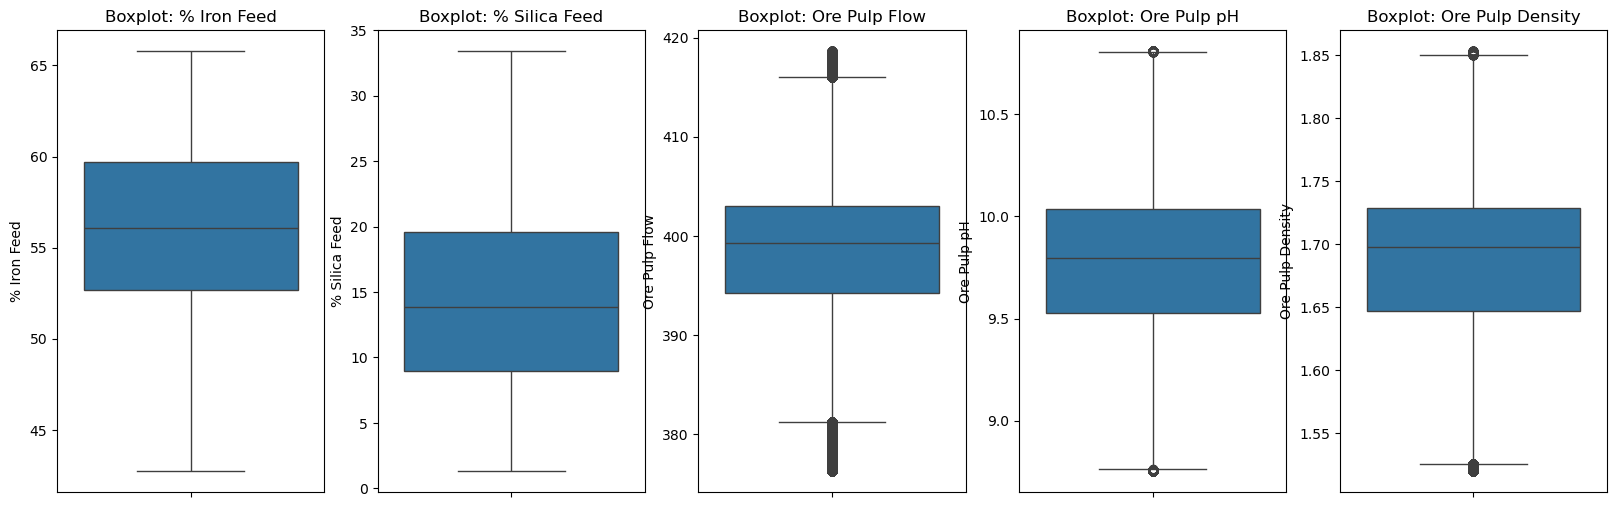

In [28]:
#Boxplot para explorar variables de alimentaci√≥n 
var_alimentacion = [
    '% Iron Feed',    
    '% Silica Feed',  
    'Ore Pulp Flow',  
    'Ore Pulp pH',
    'Ore Pulp Density'
]

fig, axs = plt.subplots(1, len(var_alimentacion), figsize = (20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(var_alimentacion):
        ax.set_title("Boxplot: " + f'{var_alimentacion[i]}')
        sns.boxplot(MinProcess_Flot_Plant[var_alimentacion[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*An√°lisis*: Observamos que las variables *Ore Pulp Flow*, *Ore Pulp PH* y *Ore Pulp Density* presentan outliers, tanto en rangos bajos como en rangos altos, para lo cu√°l realizaremos un an√°lisis caso por caso, para identificar que outliers eliminar y cu√°les conservar.

#### % Iron Feed (Hierro en la alimentaci√≥n)

*Rangos t√≠pico para flotaci√≥n inversa de hierro:*

- 55% a 68% de Fe en pulpas provenientes de concentraci√≥n magn√©tica
- Valores superiores a 70% suelen corresponder a concentrados finales, no alimentaci√≥n
- Valores inferiores a 50% pueden indicar mineral pobre o diluci√≥n excesiva

#### % Silica Feed (Silica en la alimentaci√≥n)
*Rangos t√≠pico:*

- 3% a 12% de SiO‚ÇÇ en pulpas de alimentaci√≥n
- En concentrados finales se busca <1.5% para procesos como HyL o Midrex
- Valores >15% pueden indicar ganga dominante o falla en clasificaci√≥n

#### Ore Pulp Flow (Flujo de la pulpa del mineral)
*Rangos t√≠pico:*

- Depende del dise√±o de planta, pero valores comunes est√°n entre **500‚Äì1500 m¬≥/h**
- Valores muy bajos (<100 m¬≥/h) o muy altos (>2000 m¬≥/h) pueden indicar fallas de sensor o eventos transitorios

#### Ore Pulp pH (pH de la pulpa del mineral)
*Rangos √≥ptimo para flotaci√≥n inversa de hierro:*

- **pH entre 9.5 y 11.5** es ideal para flotaci√≥n de s√≠lice
- pH <9 puede reducir la eficiencia de separaci√≥n
- pH >12 puede generar precipitaci√≥n de reactivos

#### Ore Pulp Density (densidad de la pulpa del mineral)
*Rangos t√≠pico:*

- **1.2 a 1.5 g/cm¬≥** para pulpas con 30‚Äì40% s√≥lidos
- Densidades <1.1 o >1.6 pueden indicar diluci√≥n excesiva o sobrecarga

#### An√°lisis de dosificaci√≥n de reactivos

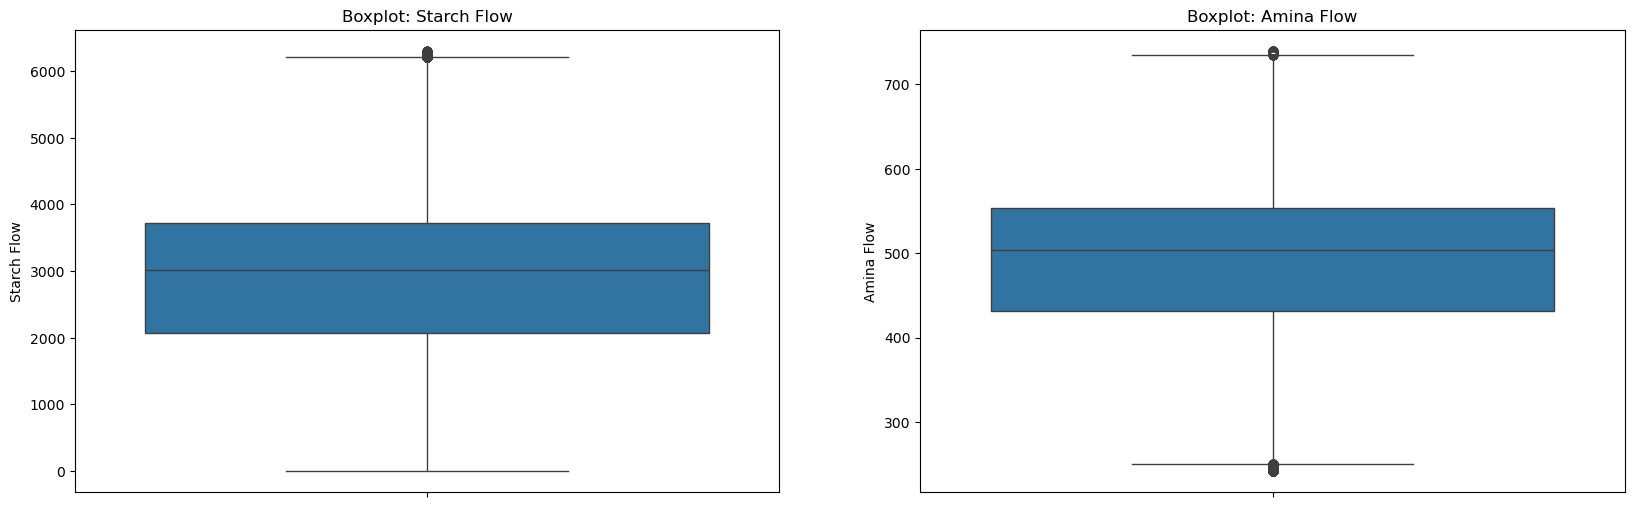

In [29]:
#Boxplot para explorar variables de dosificaci√≥n de reactivos 
dos_reactivos = [
    'Starch Flow', # flujo de almidon (depresor)
    'Amina Flow'   # flujo de amina (colector)
]

fig, axs = plt.subplots(1, len(dos_reactivos), figsize = (20,6))
for i, ax in enumerate(axs.flatten()):
    if i < len(dos_reactivos):
        ax.set_title("Boxplot: " + f'{dos_reactivos[i]}')
        sns.boxplot(MinProcess_Flot_Plant[dos_reactivos[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*An√°lisis*: Observamos que las variables *Starch Flow* y *Amina Flow* presentan outliers, en rangos altos y en rangos altos y bajos respectivamente, para lo cu√°l realizaremos un an√°lisis caso por caso, para identificar que outliers eliminar y cu√°les conservar.

#### Starch Flow (Flujo de Almid√≥n)
- El almid√≥n se usa como **depresor** en la flotaci√≥n, especialmente en minerales como hierro o fosfatos.
- Su dosificaci√≥n debe ser **estable y proporcional** a la carga de mineral.

*Rangos t√≠picos en plantas industriales:* **1000 a 5000 mL/min**, dependiendo del tipo de mineral y etapa del proceso.

- Un exceso puede **sobredepresar** y reducir la recuperaci√≥n.
- Un d√©ficit puede **permitir la flotaci√≥n de ganga**, afectando la calidad del concentrado.

#### Amina Flow (Flujo de Amina)
- Las aminas se usan como **colectores** en flotaci√≥n de s√≠lice o minerales industriales.
- Su dosificaci√≥n debe ser **precisa:** exceso puede generar espuma inestable, d√©ficit reduce recuperaci√≥n.

*Rangos t√≠picos:* **400 a 700 mL/min**, aunque puede variar seg√∫n el tipo de mineral y pH.

#### An√°lisis de la Aireaci√≥n por columna

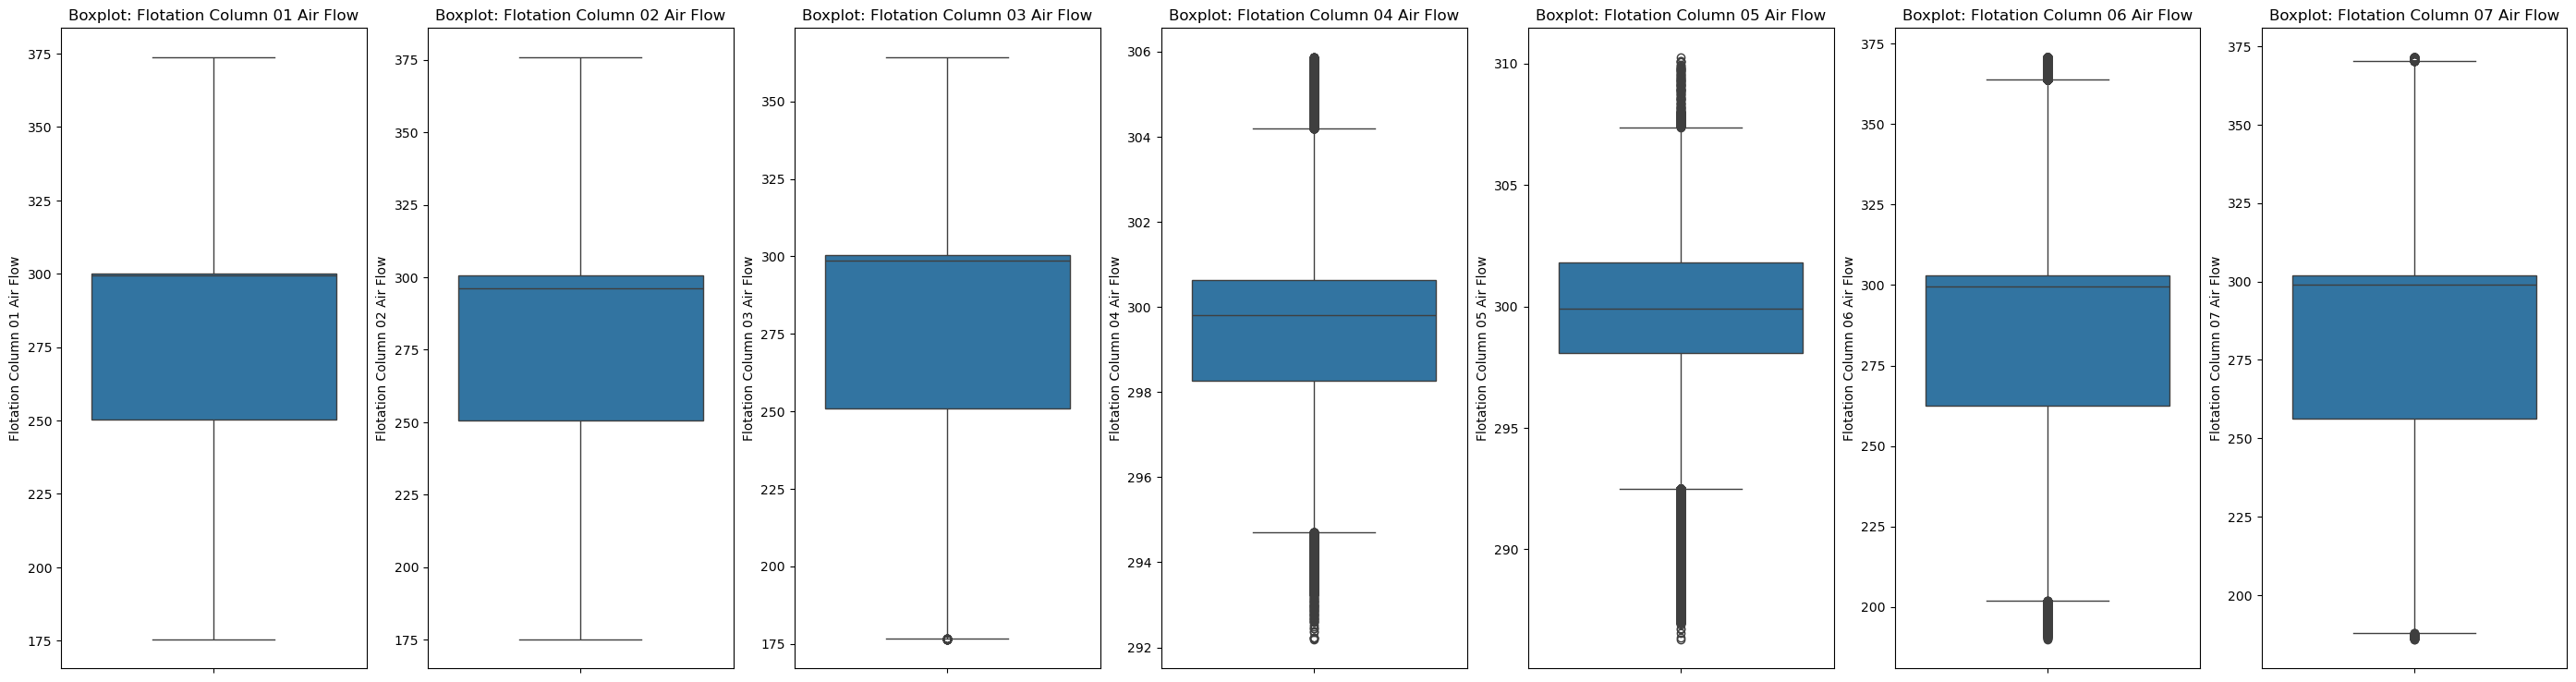

In [30]:
#Boxplot para explorar variables de aireacion por columnas
airflow_columns = [ # flujo de aire en las diferentes columnas 
    'Flotation Column 01 Air Flow', 
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Air Flow',
    'Flotation Column 05 Air Flow',
    'Flotation Column 06 Air Flow',
    'Flotation Column 07 Air Flow'
]

fig, axs = plt.subplots(1, len(airflow_columns), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(airflow_columns):
        ax.set_title("Boxplot: " + f'{airflow_columns[i]}')
        sns.boxplot(MinProcess_Flot_Plant[airflow_columns[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*An√°lisis*: Observamos que las variables *Flotation Column 04 Air Flow*, *Flotation Column 05 Air Flow*, *Flotation Column 06 Air Flow* y *Flotation Column 07 Air Flow* presentan outliers, en rangos altos y en rangos altos y bajos respectivamente, para lo cu√°l realizaremos un an√°lisis caso por caso, para identificar que outliers eliminar y cu√°les conservar.

#### Air Flow en columnas de flotaci√≥n
El flujo de aire controla la formaci√≥n de burbujas, que son esenciales para:

- Separar part√≠culas hidrof√≥bicas (minerales valiosos) de la ganga
- Mantener la zona de espuma estable
- Evitar arrastre de part√≠culas no deseadas

Por lo tanto, valores extremos en el flujo de aire pueden indicar:

- *Sobreaireaci√≥n*, burbujas grandes, baja selectividad
- *Subaireaci√≥n*, burbujas insuficientes, baja recuperaci√≥n
- *Eventos operativos* reales (cambios de v√°lvula, limpieza, paradas)
- *Errores de sensor* o ruido de medici√≥n

A partir de lo anterior se debe:
- Conservar los outliers t√©cnicos que puedan explicar variabilidad del proceso o eventos reales.
- Eliminar los extremos instrumentales que est√©n fuera del rango f√≠sico o confirmados como errores.
- Etiquetar los outliers cr√≠ticos para an√°lisis predictivo: podr√≠an anticipar fallas o baja eficiencia.

#### Rangos t√≠picos de flujo de aire en columnas de flotaci√≥n (Nm¬≥/h)
En plantas industriales, el flujo de aire por columna depende del di√°metro, altura, tipo de mineral y etapa del proceso:

|Tipo de columna|Rango t√≠pico de flujo de aire (Nm¬≥/h)|
|---------------|-------------------------------------|
|Columnas peque√±as (‚â§1 m di√°metro)|50 ‚Äì 200 Nm¬≥/h|
|Columnas medianas (1‚Äì2 m di√°metro)|200 ‚Äì 400 Nm¬≥/h|
|Columnas grandes (‚â•2.5 m di√°metro)|400 ‚Äì 800 Nm¬≥/h|
|Sobreaireaci√≥n cr√≠tica| >800 Nm¬≥/h|
|Subaireaci√≥n cr√≠tica|< 50 Nm¬≥/h|

#### An√°lisis de Nivel de pulpa por columna

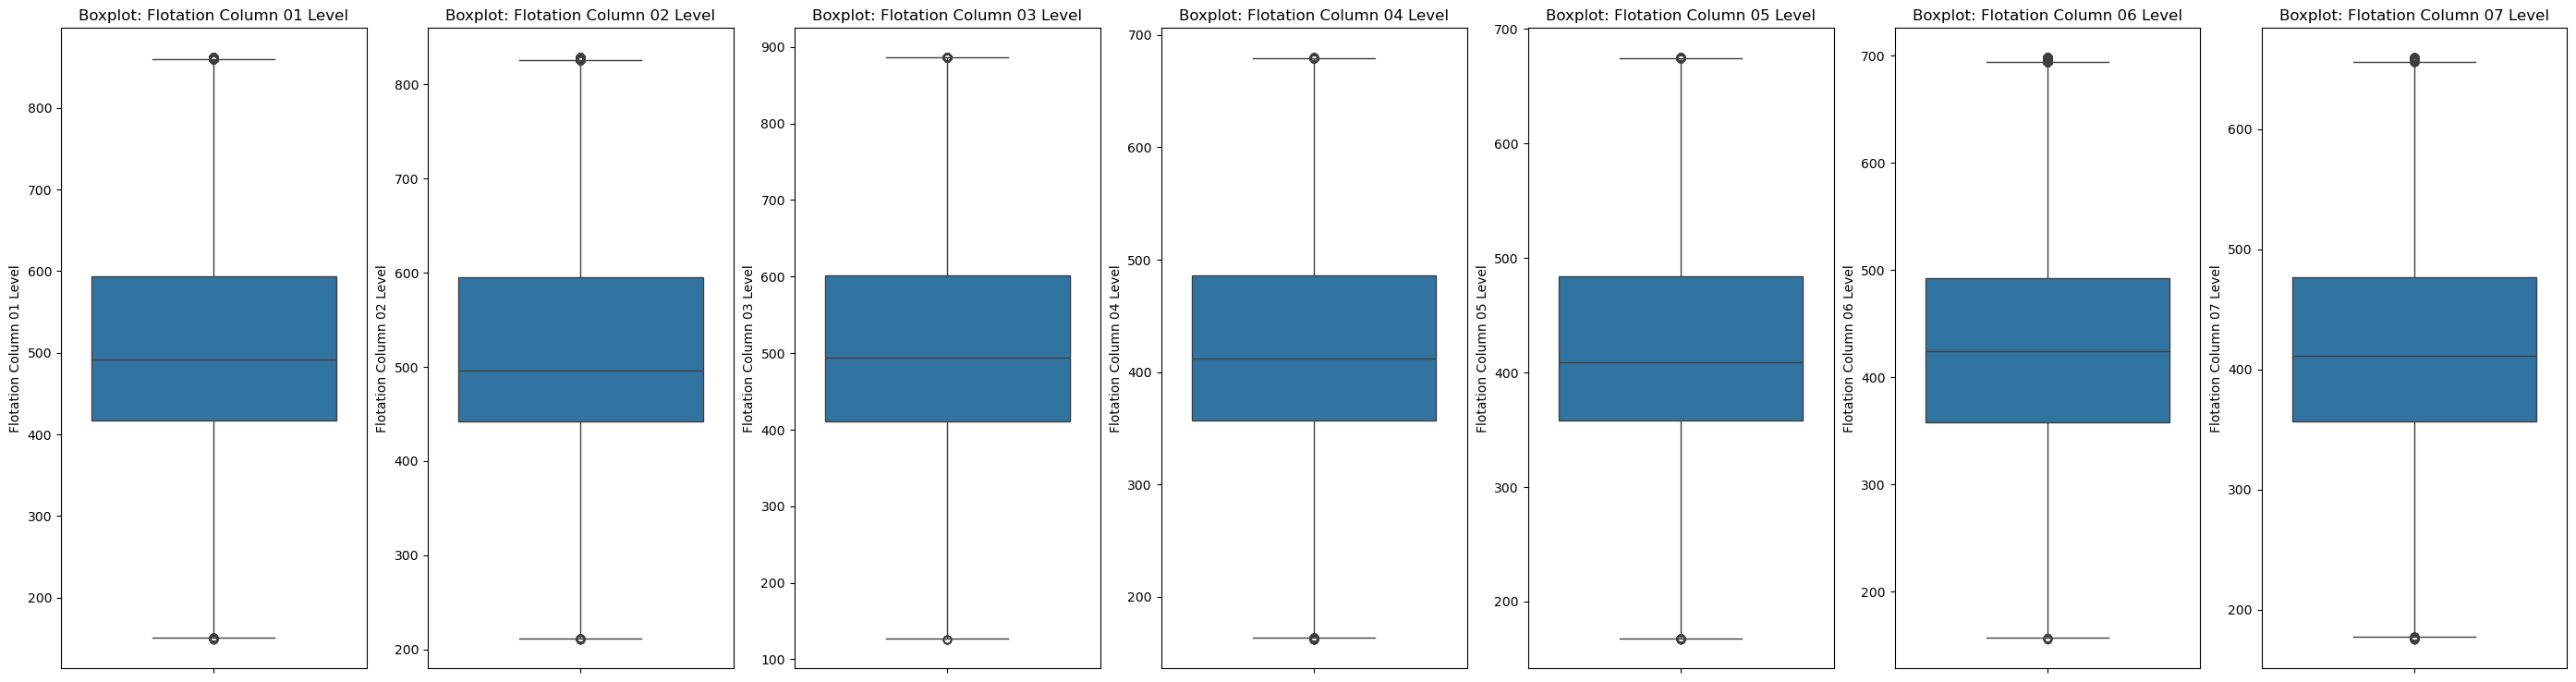

In [31]:
#Boxplot para explorar variables de nivel de pulpa por columna
pulplevel_columns = [ 
    'Flotation Column 01 Level',
    'Flotation Column 02 Level',
    'Flotation Column 03 Level',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level'
]

fig, axs = plt.subplots(1, len(pulplevel_columns), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(pulplevel_columns):
        ax.set_title("Boxplot: " + f'{pulplevel_columns[i]}')
        sns.boxplot(MinProcess_Flot_Plant[pulplevel_columns[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*An√°lisis:* Observamos para este caso que todas las variables de nivel de pulpa por columna presentan outliers, en rangos altos y bajos, y que adem√°s presentan alta dispersi√≥n. Dado que son pocos outliers los datos probablemente son v√°lidos, por tanto los conservaremos. Ahora bien, seg√∫n las m√©tricas m√°s adelante identificaremos si debemos eliminar outliers en rangos bajos y verificar si el nivel m√≠nimo est√° por debajo del rango operativo. Si no, conservaremos.

#### An√°lisis Variables de salida

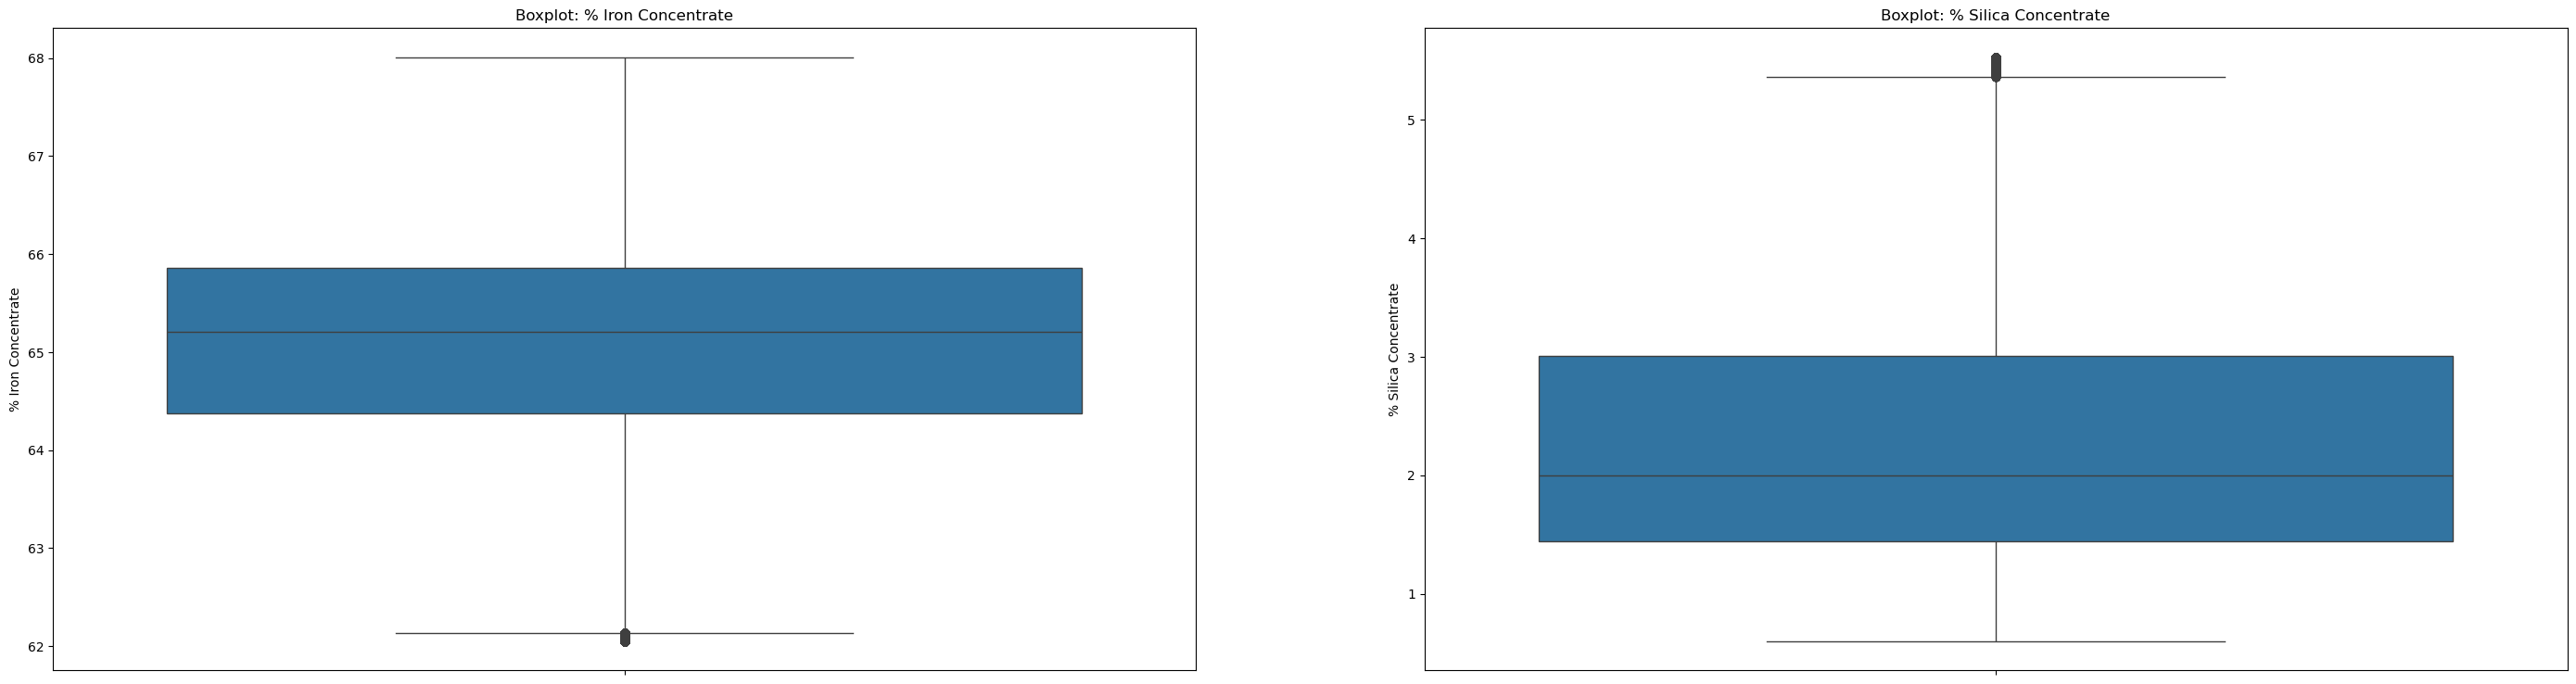

In [32]:
var_salida = [
    '% Iron Concentrate',  # Porcentaje de hierro en el concentrado final
    '% Silica Concentrate' # Porcentaje de s√≠lice en el concentrado final
]

fig, axs = plt.subplots(1, len(var_salida), figsize = (35,9))
for i, ax in enumerate(axs.flatten()):
    if i < len(var_salida):
        ax.set_title("Boxplot: " + f'{var_salida[i]}')
        sns.boxplot(MinProcess_Flot_Plant[var_salida[i]], ax=ax)
    else:
        ax.set_visible(False)

plt.show() 

*An√°lisis:* Observamos para este caso que para las variables de salida *% Iron Concentrate* y *% Silica Concentrate*, sin embargo, dado que la variable *Iron Concentrate* esta altamente correlacionada con *Silica concentrate*, estudiaremos nada m√°s esta √∫ltima.

#### % Silica Concentrate

En procesos de flotaci√≥n, el porcentaje de s√≠lice en el concentrado constituye un indicador directo de calidad del producto final. Valores elevados de s√≠lice son generalmente indeseables, ya que:

- Disminuyen la pureza del concentrado met√°lico
- Incrementan los costos asociados a etapas posteriores de refinaci√≥n
- Pueden evidenciar deficiencias en la eficiencia del proceso de separaci√≥n de ganga

Por tanto, esta variable no solo es cr√≠tica desde el punto de vista metal√∫rgico, sino que sus valores at√≠picos (outliers) pueden representar eventos operativos relevantes, como desviaciones en la dosificaci√≥n de reactivos, variaciones en las condiciones de pulpa o problemas de control en las columnas de flotaci√≥n.

## An√°lisis del proceso a partir del EDA
- Identificar correlaciones entre variables del proceso
- Visualizar tendencias temporales, para explorar variabilidad por turnos
- Mapear relaciones f√≠sico-qu√≠micas: por ejemplo, ¬øc√≥mo influye la dosificaci√≥n de colector o la velocidad de aire en la s√≠lice final?


### Identificar correlaciones entre variables de proceso
### Correlaciones Lineales

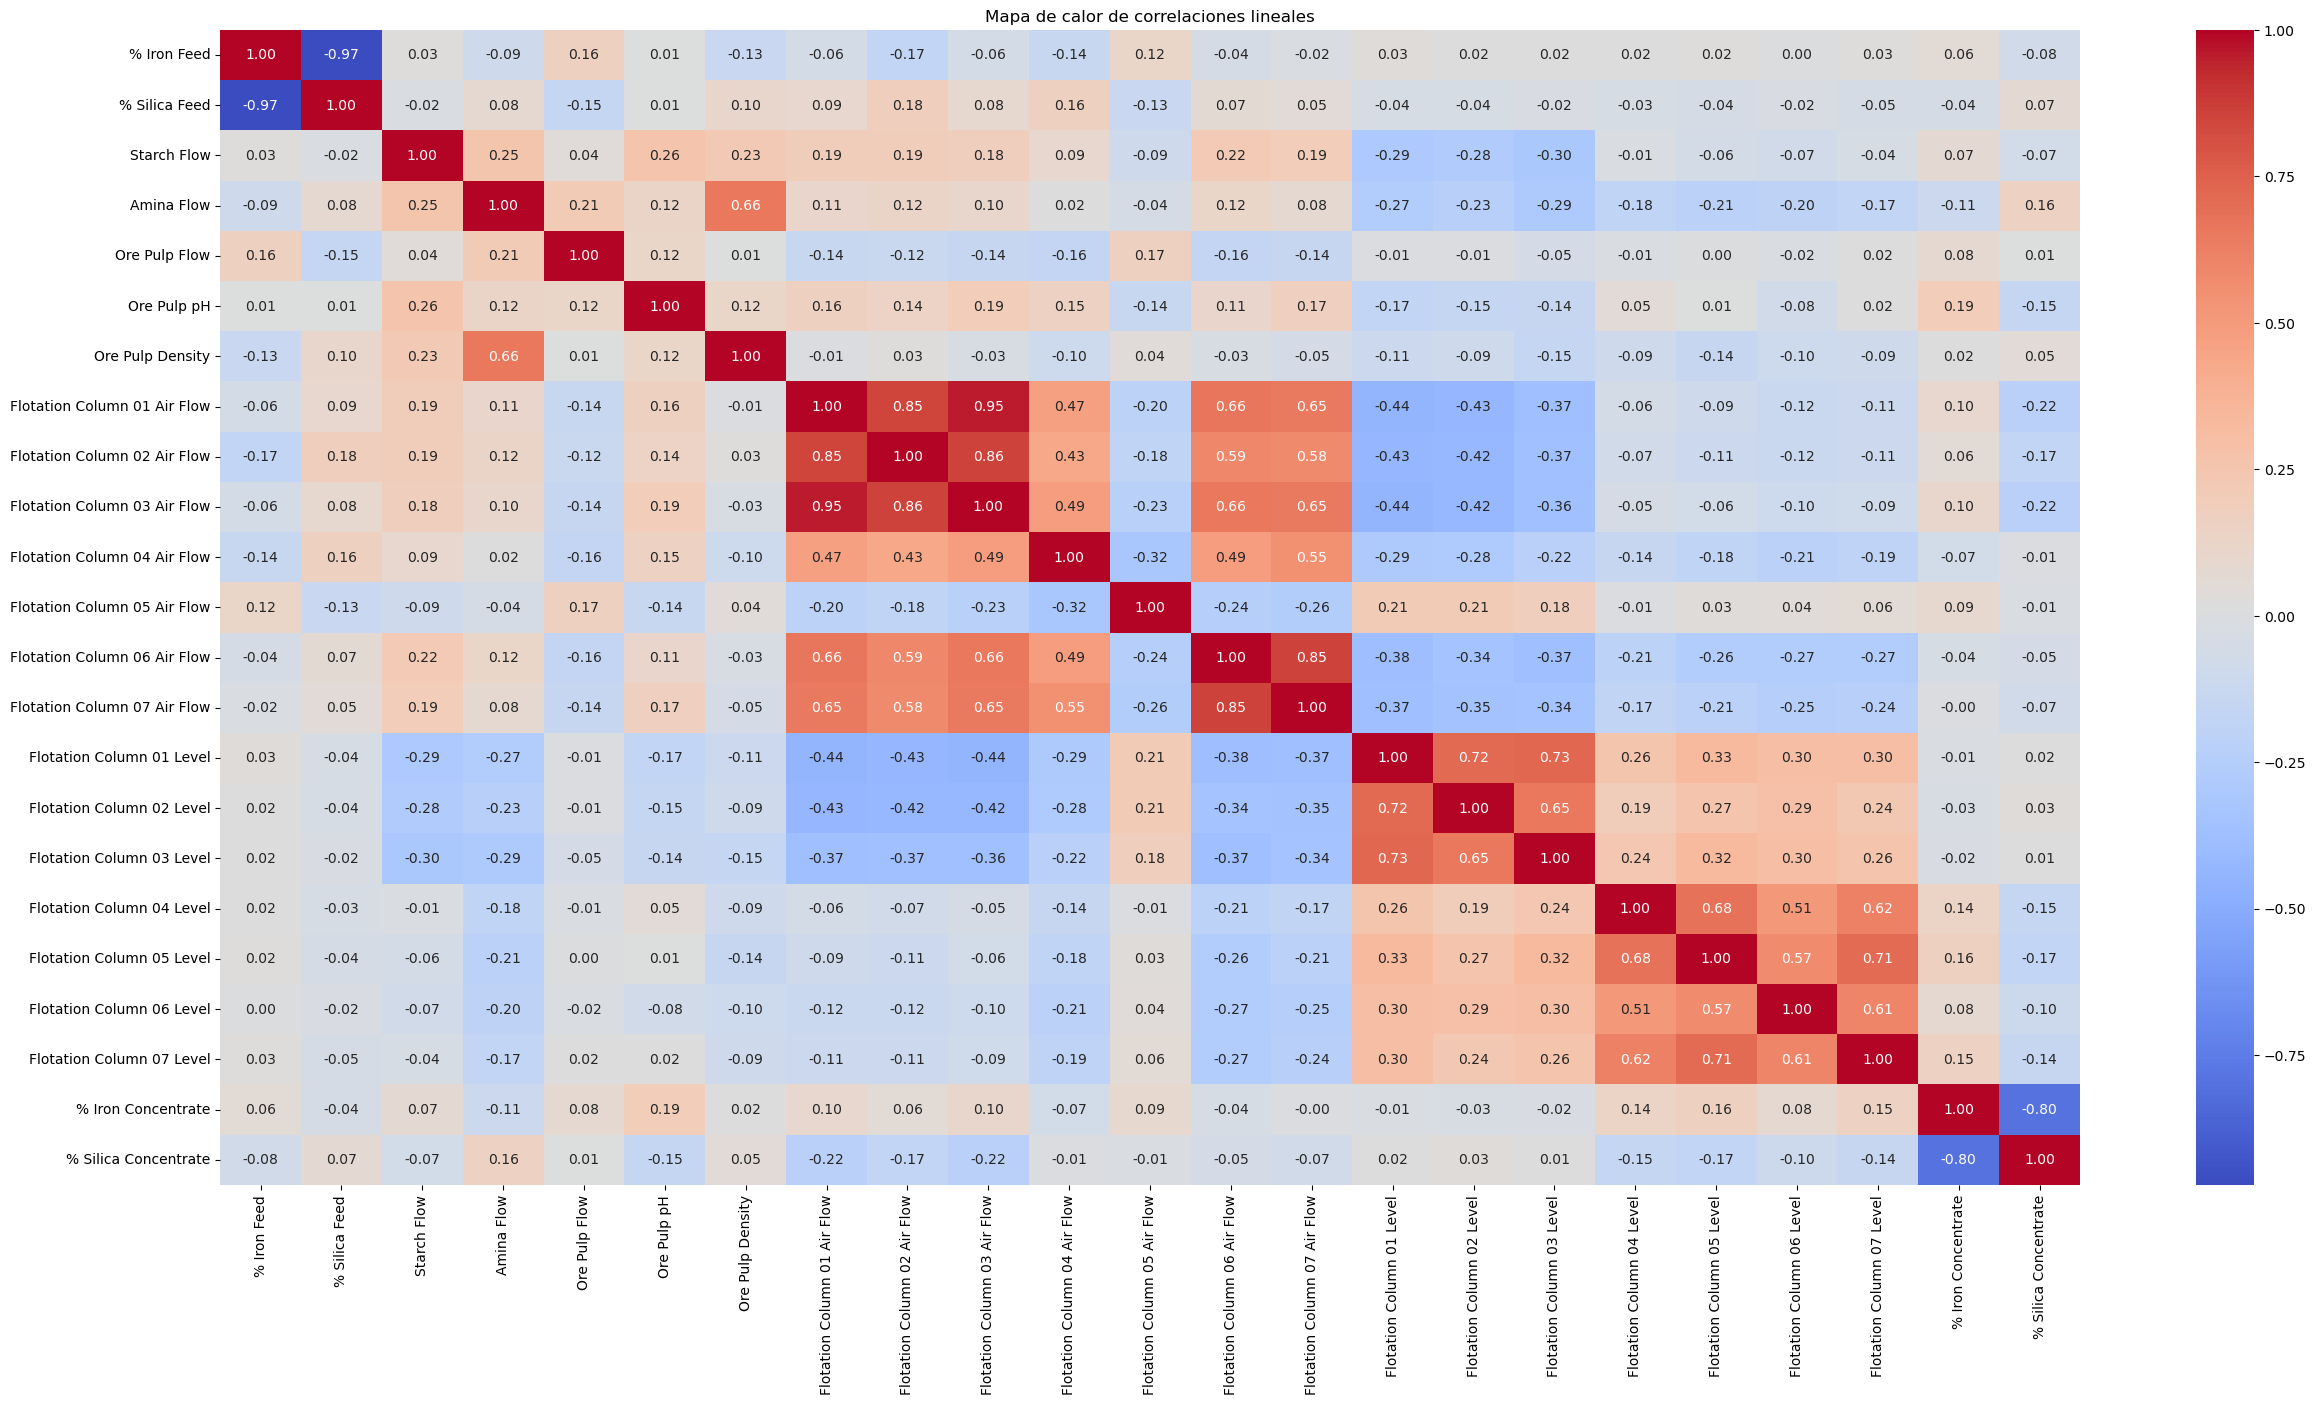

In [37]:
#Correlacion de las variables n√∫mericas
MinProcess_Flot_Plant_df = MinProcess_Flot_Plant.drop(columns='date')
MinProcess_Flot_Plant_df.corr() 

#Visualizaci√≥n de un mapa de calor para identificar correlaciones lineales 
plt.figure(figsize=(30,15)) #ajustar el tamano de la figura
sns.heatmap(MinProcess_Flot_Plant_df.corr(), annot=True, cmap='coolwarm', fmt=".2f") #crear mapa de calor
plt.title("Mapa de calor de correlaciones lineales")
plt.show()

*An√°lisis del mapa de calor de correlaciones lineales*

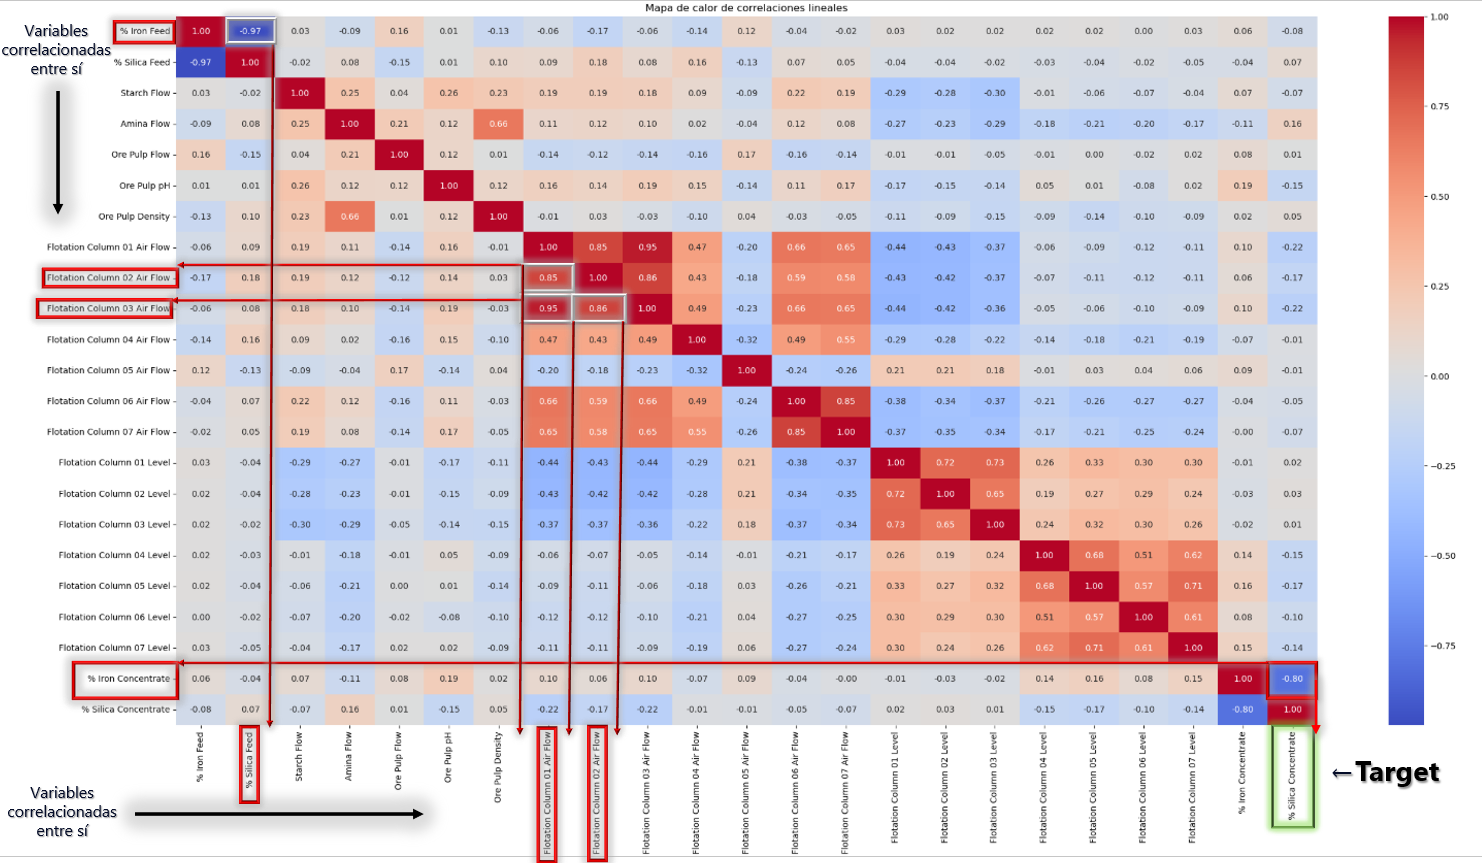

A partir de la visualizaci√≥n del mapa de calor hemos resaltado las variables que est√°n altamente correlacionadas entre s√≠, y que por tanto nos brindan informaci√≥n similar, lo que nos permite eliminar un de ellas. Observamos entonces que: 
- *Flotation Column 02 Air Flow* se relaciona con *Flotation Column 01 Air Flow*
- *Flotation Column 03 Air Flow* se relaciona con *Flotation Column 01 Air Flow* y *Flotation Column 02 Air Flow*

As√≠ mismo observamos que las variables de alimentaci√≥n *% Iron Feed* y *% Silica Feed* est√°n inversamente correlacionadas entre s√≠.

### Calcular el VIF (Variance Inflation Factor)
El **VIF (Variance Inflation Factor)** o **Factor de Inflaci√≥n de la Varianza** es una m√©trica estad√≠stica que te ayuda a detectar **multicolinealidad** entre variables independientes en un modelo de regresi√≥n.

#### Interpretaci√≥n de los valores VIF
|Valor VIF|Interpretaci√≥n|Acci√≥n recomendada|
|---------|--------------|------------------|
|1|No hay multicolinealidad|‚úÖ Conservar|
|1‚Äì5|Multicolinealidad moderada|‚ö†Ô∏è Evaluar impacto|
|>5|Multicolinealidad significativa|‚ùå Considerar eliminar|
|>10|Muy alta multicolinealidad|üö® Eliminar o transformar|

Calcularemos el VIF para identificar si realmente a pesar de que dos variables est√©n correlacionadas es apropiado eliminarlas. 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# MinProcess_Flot_Plant_df es el DataFrame con variables independientes
X = add_constant(MinProcess_Flot_Plant_df)  # Agrega constante para la regresi√≥n
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                        Variable      VIF
0                          const 49036.50
1                    % Iron Feed    19.38
2                  % Silica Feed    19.19
3                    Starch Flow     1.27
4                     Amina Flow     2.25
5                  Ore Pulp Flow     1.26
6                    Ore Pulp pH     1.23
7               Ore Pulp Density     2.04
8   Flotation Column 01 Air Flow    12.39
9   Flotation Column 02 Air Flow     4.36
10  Flotation Column 03 Air Flow    13.83
11  Flotation Column 04 Air Flow     1.68
12  Flotation Column 05 Air Flow     1.23
13  Flotation Column 06 Air Flow     4.37
14  Flotation Column 07 Air Flow     4.28
15     Flotation Column 01 Level     2.92
16     Flotation Column 02 Level     2.36
17     Flotation Column 03 Level     2.44
18     Flotation Column 04 Level     2.07
19     Flotation Column 05 Level     2.73
20     Flotation Column 06 Level     1.82
21     Flotation Column 07 Level     2.46
22            % Iron Concentrate  

A partir de los resultados del **Variance Inflation Factor**, observamos que SI es estadisticamente v√°lido eliminar las variables identificadas anteriormente en el diagrama de correlacion de Pearson dado que presentan alta multicolinealidad. Por tanto se tomar√° la decisi√≥n de eliminar *Flotation Column 01 Air Flow*, *Flotation Column 03 Air Flow*. Para el caso de *% Iron Feed* y *% Silica Feed* podemos conservar solo una, idealmente la que tenga mayor correlaci√≥n con mi variable objetivo o m√°s relevancia t√©cnica para el proceso, la cu√°l en este caso es *% Silica Feed*.

### Visualizar tendencias temporales: ¬øhay variabilidad por turno, d√≠a/noche, fines de semana?

In [7]:
# Configurar a datatime la columna de tiempo "date"
MinProcess_Flot_Plant["date"] = pd.to_datetime(MinProcess_Flot_Plant["date"])
#Definir la columna como indice
MinProcess_Flot_Plant = MinProcess_Flot_Plant.set_index("date")

# Crear variables de turno, d√≠a/noche o fin de semana
# Ejemplo: Turno 1 (6am-2pm), Turno 2 (2pm-10pm), Turno 3 (10pm-6am)
def asignar_turno(hora):
    if 6 <= hora < 14:
        return "Turno 1 (Ma√±ana)"
    elif 14 <= hora < 22:
        return "Turno 2 (Tarde)"
    else:
        return "Turno 3 (Noche)"

MinProcess_Flot_Plant["turno"] = MinProcess_Flot_Plant.index.hour.map(asignar_turno)

# D√≠a o noche (simplificado: 6am-6pm = d√≠a, 6pm-6am = noche)
MinProcess_Flot_Plant["dia_noche"] = MinProcess_Flot_Plant.index.hour.map(lambda h: "D√≠a" if 6 <= h < 18 else "Noche")

# Fin de semana
MinProcess_Flot_Plant["fin_de_semana"] = MinProcess_Flot_Plant.index.dayofweek.map(lambda d: "S√≠" if d >= 5 else "No")

In [ ]:
print(MinProcess_Flot_Plant[["turno", "dia_noche", "fin_de_semana"]].head())

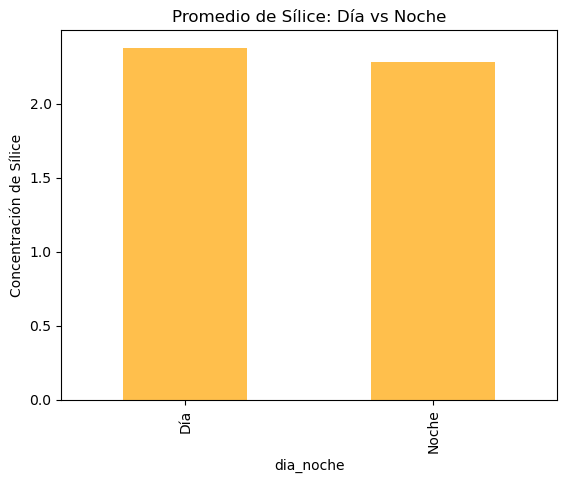

In [8]:
#Visualizar tendencias: variaci√≥n % silica turno (d√≠a/noche)

MinProcess_Flot_Plant.groupby("dia_noche")["% Silica Concentrate"].mean().plot(kind="bar", color="orange", alpha=0.7)
plt.title("Promedio de S√≠lice: D√≠a vs Noche")
plt.ylabel("Concentraci√≥n de S√≠lice")
plt.show()

La diferencia observada de variaci√≥n % silica concentrate por turno d√≠a/noche es minima.

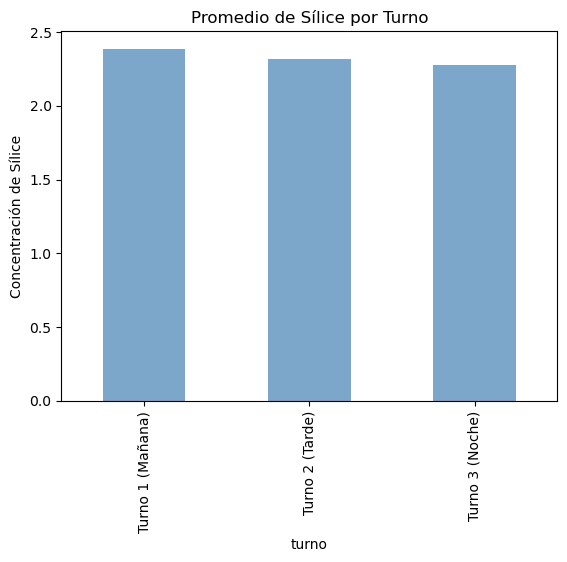

In [11]:
#Visualizar tendencias: variaci√≥n % silica por los 3 turnos
MinProcess_Flot_Plant.groupby("turno")["% Silica Concentrate"].mean().plot(kind="bar", color="steelblue", alpha=0.7)
plt.title("Promedio de S√≠lice por Turno")
plt.ylabel("Concentraci√≥n de S√≠lice")
plt.show()

La variaci√≥n observada en el promedio de % S√≠lica entre los distintos turnos (d√≠a, noche y fin de semana) resulta m√≠nima, lo que sugiere que el factor horario no representa una influencia significativa en el comportamiento de la variable objetivo.

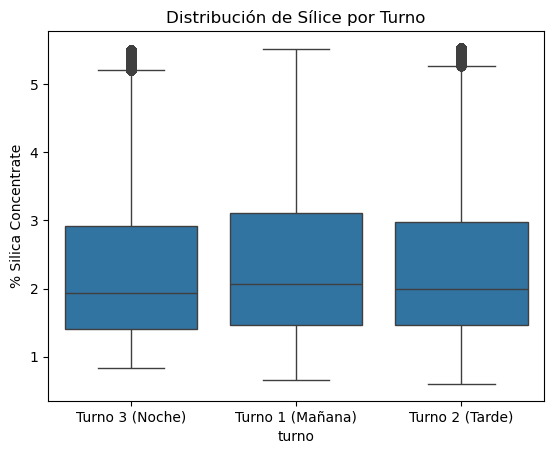

In [13]:
# Visualizaci√≥n por categor√≠as
sns.boxplot(x="turno", y="% Silica Concentrate", data=MinProcess_Flot_Plant)
plt.title("Distribuci√≥n de S√≠lice por Turno")
plt.show()

Si bien la variaci√≥n del promedio de % S√≠lica entre los turnos (d√≠a, noche y fin de semana) resulta m√≠nima, en la gr√°fica de distribuci√≥n se aprecia que los turnos 2 y 3 presentan un mayor n√∫mero de valores at√≠picos por encima del l√≠mite superior de control. Esto sugiere que, aunque el desempe√±o promedio del proceso se mantiene estable a lo largo de los turnos, existen episodios espec√≠ficos de inestabilidad en horario nocturno que ameritan una revisi√≥n de las condiciones operativas y de factores asociados como mano de obra, temperatura o desempe√±o de equipos.

### Mapear correlaciones fisico-qu√≠micas

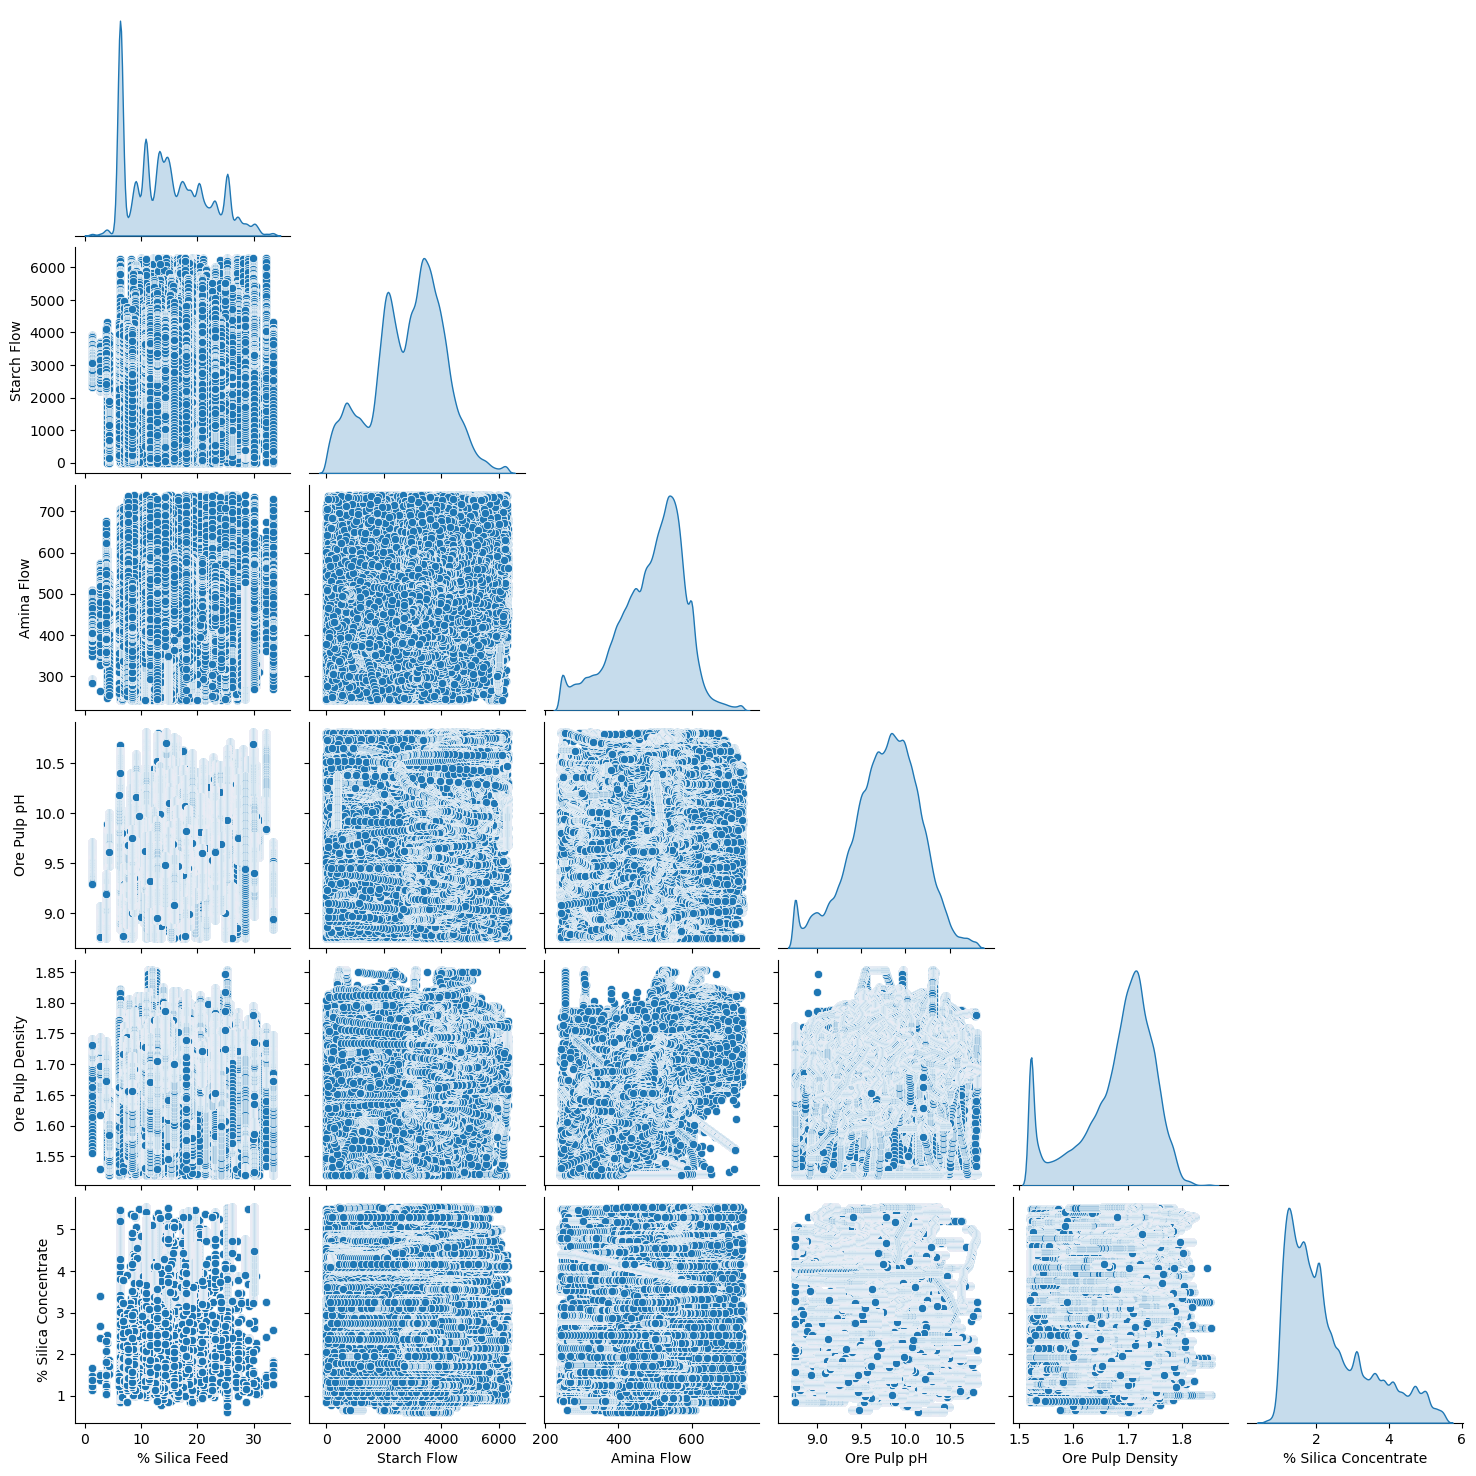

In [15]:
sns.pairplot(MinProcess_Flot_Plant, 
             vars=["% Silica Feed","Starch Flow", "Amina Flow", "Ore Pulp pH", "Ore Pulp Density", "% Silica Concentrate"],
             diag_kind="kde", 
             corner=True)
plt.show()

En el mapa de correlaciones visual no se identifican relaciones lineales evidentes entre las variables f√≠sico-qu√≠micas y la variable objetivo (% S√≠lica Concentrate). Sin embargo, se observa una leve asociaci√≥n entre *Amina Flow* y *Ore Pulp Density*, la cual fue confirmada al cuantificarla mediante la matriz de correlaci√≥n de Pearson.

## Preprocesamiento de datos

#### Eliminar variables altamente correlacionadas entre s√≠ 

In [68]:
MinProcess_Flot_Plant_new = MinProcess_Flot_Plant.drop(columns=['Flotation Column 03 Air Flow', 'Flotation Column 01 Air Flow', '% Iron Feed']) 
MinProcess_Flot_Plant_new

date  % Silica Feed  Starch Flow  Amina Flow  \
0       2017-03-10 01:00:00          16.98      3019.53      557.43   
1       2017-03-10 01:00:00          16.98      3024.41      563.97   
2       2017-03-10 01:00:00          16.98      3043.46      568.05   
3       2017-03-10 01:00:00          16.98      3047.36      568.66   
4       2017-03-10 01:00:00          16.98      3033.69      558.17   
...                     ...            ...          ...         ...   
737448  2017-09-09 23:00:00          23.20      2710.94      441.05   
737449  2017-09-09 23:00:00          23.20      2692.01      473.44   
737450  2017-09-09 23:00:00          23.20      2692.20      500.49   
737451  2017-09-09 23:00:00          23.20      1164.12      491.55   
737452  2017-09-09 23:00:00          23.20      1164.12      468.02   

        Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
0              395.71        10.07              1.74   
1              397.38        10.07              1.74   
2              399.67        10.07              1.74   
3              397.94        10.07              1.74   
4              400.25        10.07              1.74   
...               ...          ...               ...   
737448         386.57         9.62              1.65   
737449         384.94         9.62              1.65   
737450         383.50         9.62              1.65   
737451         384.98         9.62              1.65   
737452         384.80         9.61              1.65   

        Flotation Column 02 Air Flow  Flotation Column 04 Air Flow  \
0                             253.24                        295.10   
1                             250.53                        295.10   
2                             247.87                        295.10   
3                             254.49                        295.10   
4                             252.14                        295.10   
...                              ...                           ...   
737448                        298.79                        299.92   
737449                        301.88                        299.71   
737450                        307.40                        299.93   
737451                        301.96                        299.37   
737452                        292.87                        298.72   

        Flotation Column 05 Air Flow  ...  Flotation Column 07 Air Flow  \
0                             306.40  ...                        250.88   
1                             306.40  ...                        248.99   
2                             306.40  ...                        248.07   
3                             306.40  ...                        251.15   
4                             306.40  ...                        248.93   
...                              ...  ...                           ...   
737448                        299.62  ...                        313.69   
737449                        300.46  ...                        236.70   
737450                        299.71  ...                        225.88   
737451                        298.82  ...                        308.12   
737452                        297.39  ...                        308.12   

        Flotation Column 01 Level  Flotation Column 02 Level  \
0                          457.40                     432.96   
1                          451.89                     429.56   
2                          451.24                     468.93   
3                          452.44                     458.17   
4                          452.44                     452.90   
...                           ...                        ...   
737448                     392.16                     430.70   
737449                     401.50                     404.62   
737450                     408.90                     399.32   
737451                     405.11                     466.83   
737452                     413.75                  

#### Eliminar outliers

- **Conservar outliers si representan eventos reales del proceso** (arranques, paradas, fallas) y los est√°s analizando como parte de la variabilidad operativa.
- **Elim√≠narlos si son errores de medici√≥n, duplicados, o valores f√≠sicamente imposibles** seg√∫n el contexto t√©cnico.

Seg√∫n la literatura y el contexto t√©cnico compartido eliminaremos los siguientes outliers:

*Variables de alimentaci√≥n:*
- Para *Ore Pulp Flow* datos at√≠picos correspondientes a valores muy bajos **(VÃá < 380 m¬≥/h)**.
- Para *Ore Pulp pH* datos at√≠picos correspondientes a valores muy bajos **(pH < 9)**.
- Para *Ore Pulp Density* datos at√≠picos correspondientes a valores muy altos **(œÅ < 1.5 g/cm¬≥)**.

*Dosificaci√≥n de reactivos:*
- Para *Starch Flow* datos at√≠picos correspondientes a valores muy altos **(VÃá > 6000 m¬≥/h)**.
- Para *Amina Flow* datos at√≠picos correspondientes a valores muy bajos **(VÃá < 300 m¬≥/h)** y muy altos **(VÃá > 700 m¬≥/h)**.

In [69]:
# Definimos la m√°scara de outliers (todo lo que se quiere ELIMINAR)
df = MinProcess_Flot_Plant_new.copy()

mask_outliers = (
    (df ['Ore Pulp Flow'] < 380) |      # variables de alimentaci√≥n 
    (df ['Ore Pulp pH'] < 9) |          # variables de alimentaci√≥n
    (df ['Ore Pulp Density'] > 1.85) |  # variables de alimentaci√≥n
    (df ['Starch Flow'] > 6000) |       # dosificaci√≥n de reactivos
    (df ['Amina Flow'] < 300) |         # dosificaci√≥n de reactivos
    (df ['Amina Flow'] > 700)           # dosificaci√≥n de reactivos
)

# Nos quedamos con lo que NO es outlier
MinProcess_Flot_Plant_clean = df.loc[~mask_outliers].copy()

#Verificaci√≥n r√°pida (para asegurar que s√≠ se eliminaron)
assert (MinProcess_Flot_Plant_clean['Ore Pulp Flow'] >= 380).all()
assert (MinProcess_Flot_Plant_clean['Ore Pulp pH'] >= 9).all()
assert (MinProcess_Flot_Plant_clean['Ore Pulp Density'] <= 1.85).all()
assert (MinProcess_Flot_Plant_clean['Starch Flow'] <= 6000).all()
assert (MinProcess_Flot_Plant_clean['Amina Flow'] >= 300).all()
assert (MinProcess_Flot_Plant_clean['Amina Flow'] <= 700).all()

In [70]:
#Verificar cambios en la dimensionalidad del dataset
print(f"Dimensionalidad del dataset antes de eliminar outliers {MinProcess_Flot_Plant.shape}")
print(f"Dimensionalidad del dataset despu√©s de eliminar outliers {MinProcess_Flot_Plant_clean.shape}")

Dimensionalidad del dataset antes de eliminar outliers (737453, 24)
Dimensionalidad del dataset despu√©s de eliminar outliers (614544, 21)


## Procesamiento de datos 
### Pipeline

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
import category_encoders as ce

df = MinProcess_Flot_Plant_clean.copy()
y = df["% Silica Concentrate"]
X = df.drop(columns=['% Silica Concentrate', 'date'])

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
    ],
    remainder="passthrough"
)

In [72]:
#Visualizar pipeline de procesamiento
preprocess 

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['% Silica Feed', 'Starch Flow', 'Amina Flow',
                                  'Ore Pulp Flow', 'Ore Pulp pH',
                                  'Ore Pulp Density',
                                  'Flotation Column 02 Air Flow',
                                  'Flotation Column 04 Air Flow',
                                  'Flotation Column 05 Air Flow',
                                  'Flotation Column 06 Air Flow',
                                  'Flotation Column 07 Air Flow',
                                  'Flotation Column 01 Level',
                                  'Flotation Column 02 Level',
                                  'Flotation Column 03 Level',
                                  'Flotation Column 04 Level',
                                  'Flotation Column 05 Level',
                                  'Flotation Column 06 Level',
                                  'Flotation Column 07 Level',
                                  '% Iron Concentrate'])])

In [73]:
X

% Silica Feed  Starch Flow  Amina Flow  Ore Pulp Flow  Ore Pulp pH  \
0               16.98      3019.53      557.43         395.71        10.07   
1               16.98      3024.41      563.97         397.38        10.07   
2               16.98      3043.46      568.05         399.67        10.07   
3               16.98      3047.36      568.66         397.94        10.07   
4               16.98      3033.69      558.17         400.25        10.07   
...               ...          ...         ...            ...          ...   
737448          23.20      2710.94      441.05         386.57         9.62   
737449          23.20      2692.01      473.44         384.94         9.62   
737450          23.20      2692.20      500.49         383.50         9.62   
737451          23.20      1164.12      491.55         384.98         9.62   
737452          23.20      1164.12      468.02         384.80         9.61   

        Ore Pulp Density  Flotation Column 02 Air Flow  \
0                   1.74                        253.24   
1                   1.74                        250.53   
2                   1.74                        247.87   
3                   1.74                        254.49   
4                   1.74                        252.14   
...                  ...                           ...   
737448              1.65                        298.79   
737449              1.65                        301.88   
737450              1.65                        307.40   
737451              1.65                        301.96   
737452              1.65                        292.87   

        Flotation Column 04 Air Flow  Flotation Column 05 Air Flow  \
0                             295.10                        306.40   
1                             295.10                        306.40   
2                             295.10                        306.40   
3                             295.10                        306.40   
4                             295.10                        306.40   
...                              ...                           ...   
737448                        299.92                        299.62   
737449                        299.71                        300.46   
737450                        299.93                        299.71   
737451                        299.37                        298.82   
737452                        298.72                        297.39   

        Flotation Column 06 Air Flow  Flotation Column 07 Air Flow  \
0                             250.22                        250.88   
1                             250.14                        248.99   
2                             251.34                        248.07   
3                             250.42                        251.15   
4                             249.98                        248.93   
...                              ...                           ...   
737448                        346.79                        313.69   
737449                        330.02                        236.70   
737450                        329.59                        225.88   
737451                        351.45                        308.12   
737452                        362.46                        308.12   

        Flotation Column 01 Level  Flotation Column 02 Level  \
0                          457.40                     432.96   
1                          451.89                     429.56   
2                          451.24                     468.93   
3                          452.44                     458.17   
4                          452.44                     452.90   
...                           ...                        ...   
737448                     392.16                     430.70   
737449                     401.50                     404.62   
737450                     408.90                     399.32   
737451                     405.11                   

## Entrenamiento y Evaluaci√≥n de los modelos

#### 1. Separaci√≥n de la data de entrenamiento y prueba

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

#### 2. Seleccionar los modelos a usar
Para este ejercicio por la cantidad de registros que se tienen y para evitar problemas de ineficiencia en la memoria, se evaluar√°n los modelos seleccionados por individual, las m√©tricas de los mismos se guardar√°n en un documento excel, para posteriormente verlas todas en conjunto y observar el modelo con mejor rendimiento. Los modelos elegidos son:

- Decision Tree Regressor
- RandomForestRegressor
- Linear Regression
- ExtraTreesRegressor
- XGBRegressor
- BaggingRegressor

#### 3. Entrenar, Realizar predicci√≥n y Evaluar los modelos seleccionados

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

**Decision Tree Regression**

In [77]:
#Instanciar los modelos y configurar sus hiperparametros
model_DT = DecisionTreeRegressor(random_state=42)

# Entrenamiento y predicci√≥n
model_DT.fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_DT = {
    "Modelo": "DecisionTreeRegressor",
    "MSE": mean_squared_error(y_test, y_pred_DT),
    "MAE": mean_absolute_error(y_test, y_pred_DT),
    "R2": r2_score(y_test, y_pred_DT)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_DT])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_DT

**Random Forest Regressor**

In [231]:
#Instanciar los modelos y configurar sus hiperparametros
model_RF = RandomForestRegressor(random_state=42,  max_features="sqrt",max_depth=20, min_samples_split=5, n_estimators=600, n_jobs=-1)

# Entrenamiento y predicci√≥n
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_RF = {
    "Modelo": "RandomForestRegressor",
    "MSE": mean_squared_error(y_test, y_pred_RF),
    "MAE": mean_absolute_error(y_test, y_pred_RF),
    "R2": r2_score(y_test, y_pred_RF)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_RF])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---

**Linear Regression**

In [78]:
#Instanciar los modelos y configurar sus hiperparametros
model_Linear = LinearRegression(n_jobs=None)

# Entrenamiento y predicci√≥n
model_Linear.fit(X_train, y_train)
y_pred_Linear = model_Linear.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_Linear = {
    "Modelo": "Linear Regression",
    "MSE": mean_squared_error(y_test, y_pred_Linear),
    "MAE": mean_absolute_error(y_test, y_pred_Linear),
    "R2": r2_score(y_test, y_pred_Linear)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_Linear])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_Linear

**ExtraTreesRegressor**

In [26]:
#Instanciar los modelos y configurar sus hiperparametros
model_ET = ExtraTreesRegressor(random_state=42, n_estimators=800, n_jobs=-1, max_features="sqrt")

# Entrenamiento y predicci√≥n
model_ET .fit(X_train, y_train)
y_pred_ET = model_ET.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_ET = {
    "Modelo": "ExtraTreesRegressor",
    "MSE": mean_squared_error(y_test, y_pred_ET),
    "MAE": mean_absolute_error(y_test, y_pred_ET),
    "R2": r2_score(y_test, y_pred_ET)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_ET])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_ET

**XGBRegressor** (Configuraci√≥n para datasets grandes)

In [79]:
#Instanciar los modelos y configurar sus hiperparametros
model_XGB = XGBRegressor(tree_method='hist', n_jobs=-1, verbosity=0) #Usa histogramas para acelerar el entrenamiento

# Entrenamiento y predicci√≥n
model_XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_XGB = {
    "Modelo": "XGBoostRegressor",
    "MSE": mean_squared_error(y_test, y_pred_XGB),
    "MAE": mean_absolute_error(y_test, y_pred_XGB),
    "R2": r2_score(y_test, y_pred_XGB)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_XGB])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_XGB

**BaggingRegressor** (Configuraci√≥n para datasets grandes)

In [80]:
#Instanciar los modelos y configurar sus hiperparametros
# Paso 1: Define el estimador base
base_tree = DecisionTreeRegressor(
    max_depth=10,        # Puedes ajustar seg√∫n tu dataset
    min_samples_split=5, # Controla el crecimiento del √°rbol
    random_state=42
)

# Paso 2: Define el modelo Bagging
model_Bagging = BaggingRegressor(
    estimator=base_tree,
    n_estimators=50,       # N√∫mero de √°rboles (ajustable)
    max_samples=0.8,       # Fracci√≥n del dataset por √°rbol
    max_features=1.0,      # Usa todas las features
    bootstrap=True,        # Sampling con reemplazo
    n_jobs=-1,             # Usa todos los n√∫cleos disponibles
    random_state=42
)

# Entrenamiento y predicci√≥n
model_Bagging.fit(X_train, y_train)
y_pred_Bagging = model_Bagging.predict(X_test)

# Guardar m√©tricas en un diccionario
metricas_Bagging = {
    "Modelo": "BaggingRegressor",
    "MSE": mean_squared_error(y_test, y_pred_Bagging),
    "MAE": mean_absolute_error(y_test, y_pred_Bagging),
    "R2": r2_score(y_test, y_pred_Bagging)
}

# Guardar m√©tricas y que persistan en varias corridas,a trav√©s de un DataFrame
import pandas as pd

try:
    df_metricas = pd.read_csv("metricas.csv")  # Si ya existe, lo cargamos
except FileNotFoundError:
    df_metricas = pd.DataFrame(columns=["Modelo","MSE","MAE","R2"])

# Agregar la nueva fila
df_metricas = pd.concat([df_metricas, pd.DataFrame([metricas_Bagging])], ignore_index=True)

# Guardar en CSV para persistencia
df_metricas.to_csv("metricas.csv", index=False)

# --- Eliminar modelo y predicciones de memoria ---
del model_Bagging

## Comparaci√≥n de Modelos 

In [130]:
#Eliminar filas 
df_metricas = df_metricas.drop(index = [6,7,8])
df_metricas.reset_index(drop = True, inplace = True)

In [131]:
#Dataframe de m√©tricas de evaluaci√≥n
pd.options.display.float_format = "{:.3f}".format
print(df_metricas.sort_values(by='R2', ascending = False)) #imprimir m√©tricas y ordenarlas por mejores modelos 

                  Modelo   MSE   MAE    R2
0  DecisionTreeRegressor 0.010 0.010 0.992
3    ExtraTreesRegressor 0.013 0.064 0.989
2  RandomForestRegressor 0.021 0.092 0.983
5       XGBoostRegressor 0.073 0.192 0.940
4       BaggingRegressor 0.142 0.266 0.884
1      Linear Regression 0.406 0.490 0.670


A partir del an√°lisis de los seis modelos empleados para la predicci√≥n de la variable objetivo *% Silica Concentrate*, se observan m√©tricas de desempe√±o favorables en la mayor√≠a de los casos, con excepci√≥n del modelo de Regresi√≥n Lineal, cuyo ajuste es menos preciso. Esta diferencia se evidencia en valores de $ ùëÖ^2 $ inferiores, mientras que los dem√°s modelos superan el umbral de $ ùëÖ^2 > 0.8 $, lo que indica una alta capacidad de explicaci√≥n de la varianza.

El modelo con mejor rendimiento corresponde a **Decision Tree Regressor**, el cual alcanza un coeficiente de determinaci√≥n de $ ùëÖ^2 = 0.992 $, acompa√±ado de valores bajos en el **Error Cuadr√°tico Medio (MSE)** y el **Error Absoluto Medio (MAE)**. Aunque los dem√°s modelos presentan valores de $ ùëÖ^2$ cercanos, sus m√©tricas de error son relativamente m√°s altas, lo que sugiere una menor precisi√≥n en la estimaci√≥n puntual de la variable target.

### Visualizaci√≥n de los mejores modelos

***DecisionTreeRegressor***

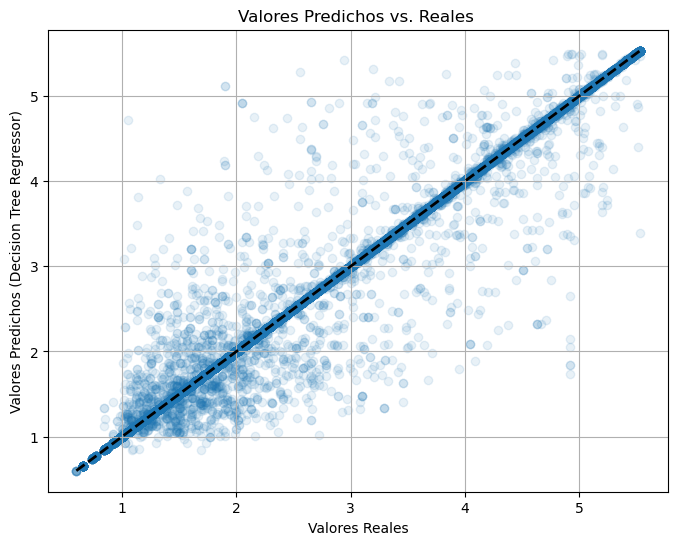

In [134]:
import matplotlib.pyplot as plt

# Crear un gr√°fico de dispersi√≥n de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DT, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (Decision Tree Regressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una l√≠nea digonal de referencia (l√≠nea y=x de identidad) - l√≠nea perfecta de predicci√≥n:
plt.plot([y_test.min(), y_test.max()], # X (l√≠mites m√≠nimo y m√°ximo de y_test)
         [y_test.min(), y_test.max()], # Y (l√≠mites m√≠nimo y m√°ximo de y_test)
         'k--', lw=2                   # l√≠nea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretaci√≥n del desempe√±o del modelo DecisionTreeRegressor**

A partir de la visualizaci√≥n de la gr√°fica *Valores Predichos vs Reales* empleando el modelo Decision Tree Regressor, se pueden extraer varias observaciones relevantes:

- La mayor√≠a de los *puntos se alinean casi perfectamente con la l√≠nea de predicci√≥n ideal* (diagonal), lo cual indica que el modelo logra una alta precisi√≥n en un n√∫mero significativo de casos. Esta concentraci√≥n de puntos alrededor de la diagonal respalda el favorable coeficiente de determinaci√≥n $ ùëÖ^2 $ que observamos previamente en las m√©tricas, reflejando una **s√≥lida capacidad predictiva** para esos datos en particular.

- Sin embargo, tambi√©n se identifican puntos que se *desv√≠an considerablemente* de dicha l√≠nea, lo que evidencia errores de predicci√≥n significativos en ciertos registros. Esta dispersi√≥n sugiere que, **aunque el modelo acierta con frecuencia, cuando falla lo hace con una magnitud considerable**, lo que podr√≠a comprometer su confiabilidad en escenarios sensibles o con alta variabilidad. En particular, estos errores podr√≠an ser cr√≠ticos en contextos donde las predicciones impactan directamente en factores como costos operativos, reputaci√≥n institucional, procesos de auditor√≠a o toma de decisiones estrat√©gicas.

*¬øQu√© podemos concluir aqu√≠?* Si bien el modelo muestra un desempe√±o aceptable en t√©rminos generales, la **amplitud de los errores** en los casos at√≠picos plantea dudas sobre su idoneidad como soluci√≥n definitiva. 

### ¬øQu√© se propone hacer en este caso? 

Con el fin de tomar una decisi√≥n definitiva sobre el modelo m√°s adecuado, se propone visualizar la distribuci√≥n de los *valores predichos vs. reales* de otros modelos, incluso en aquellos casos donde las m√©tricas de desempe√±o (como $ùëÖ^2$, $MAE$ o $MSE$) sean ligeramente inferiores. Esta comparaci√≥n visual permitir√° evaluar no solo la precisi√≥n global del modelo, sino tambi√©n su **comportamiento frente a errores extremos, dispersi√≥n y sensibilidad a valores at√≠picos**. 

El objetivo es identificar el modelo que, adem√°s de **ofrecer m√©tricas aceptables, presente una distribuci√≥n de errores m√°s controlada y consistente**, especialmente en contextos donde las *desviaciones pueden tener implicaciones cr√≠ticas* en t√©rminos de costos, auditor√≠a o reputaci√≥n institucional.

***RandomForestRegressor***

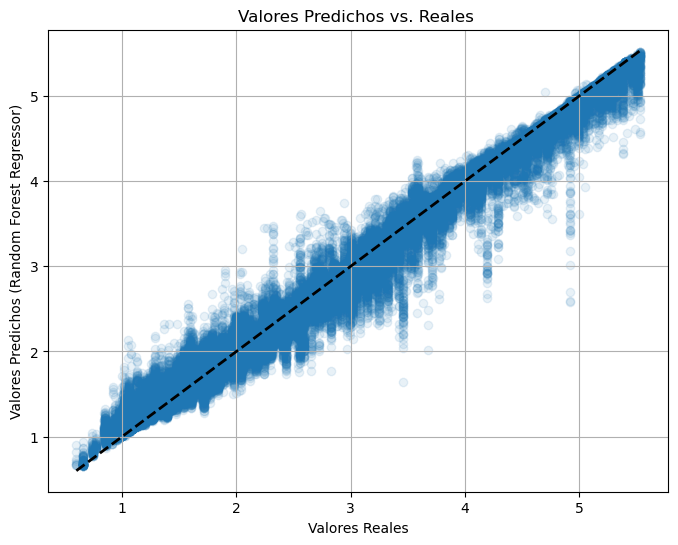

In [151]:
import matplotlib.pyplot as plt

# Crear un gr√°fico de dispersi√≥n de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (Random Forest Regressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una l√≠nea digonal de referencia (l√≠nea y=x de identidad) - l√≠nea perfecta de predicci√≥n:
plt.plot([y_test.min(), y_test.max()], # X (l√≠mites m√≠nimo y m√°ximo de y_test)
         [y_test.min(), y_test.max()], # Y (l√≠mites m√≠nimo y m√°ximo de y_test)
         'k--', lw=2                   # l√≠nea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretaci√≥n del desempe√±o del modelo RandomForestRegressor**

De la interprestaci√≥n de la gr√°fica anterior podemos resaltar varios aspectos: 

- Se observa una *alta concentraci√≥n de puntos alrededor de la l√≠nea de predicci√≥n perfecta*(diagonal), como una **Nube** podr√≠a explicarse, lo que indica que el modelo logra **estimaciones muy cercanas a los valores reales en la mayor√≠a de los casos**, sin embargo, cabe aclarar que esta predicci√≥n no es tan precisa como en **Decision Tree Regressor**, pues los puntos se acumulan como en una nube alrededor de la linea de prediccion perfecta pero no encima como pasa en Decisiton Tree. Pero se puede afirmar de igual forma que la alineaci√≥n el modelo presenta un comportamiento robusto y una capacidad predictiva s√≥lida.

- A diferencia de modelos m√°s sensibles como la **Linear Regression**, **Random Forest** tiende a *reducir el impacto de valores at√≠picos gracias a su estructura basada en m√∫ltiples √°rboles de decisi√≥n*. Esto se refleja en la *baja dispersi√≥n de los puntos y en la ausencia de errores extremos* visibles en la gr√°fica.

*¬øQu√© podemos concluir aqu√≠?* La visualizaci√≥n respalda el buen desempe√±o del Random Forest Regressor, en t√©rminos de precisi√≥n. Si las m√©tricas como $ùëÖ^2$, $MAE$ o $MSE$ acompa√±an esta evidencia visual con valores competitivos, este modelo **podr√≠a considerarse como una opci√≥n viable y confiable** para la predicci√≥n de % Silica Concentrate.

***XGBoostRegressor***

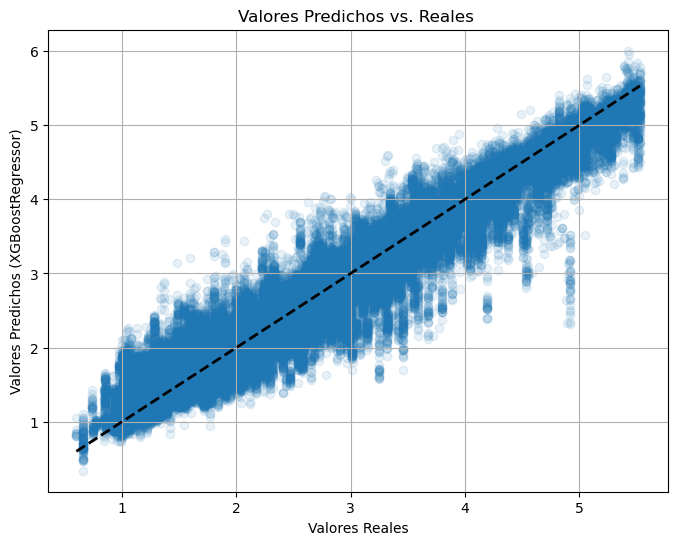

In [136]:
import matplotlib.pyplot as plt

# Crear un gr√°fico de dispersi√≥n de valores predichos vs. reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XGB, alpha=0.1)
plt.xticks(range(10)) #start, middle, end
plt.yticks(range(10)) #start, middle, end
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos (XGBoostRegressor)')
plt.title('Valores Predichos vs. Reales ')

# Dibujar una l√≠nea digonal de referencia (l√≠nea y=x de identidad) - l√≠nea perfecta de predicci√≥n:
plt.plot([y_test.min(), y_test.max()], # X (l√≠mites m√≠nimo y m√°ximo de y_test)
         [y_test.min(), y_test.max()], # Y (l√≠mites m√≠nimo y m√°ximo de y_test)
         'k--', lw=2                   # l√≠nea negra discontinua 'k--' y grosor de la linea 'lw'
) 
plt.grid()
plt.show()

**Interpretaci√≥n del desempe√±o del modelo XGBoostRegressor**

De la interprestaci√≥n de la gr√°fica anterior podemos resaltar varios aspectos:

- El modelo de **XGBoost** muestra un comportamiento similar aunque con **menor precisi√≥n en los valores medios** en comparaci√≥n al modelo de **RandomForest**. A√∫n as√≠ la mayor√≠a de los puntos se agrupan en torno a la l√≠nea diagonal ideal $ ùë¶ = ùë• $, lo que indica una buena concordancia entre los valores predichos y los reales.
- No obstante, al comparar ambos modelos con mayor detalle, se observa que **XGBoost presenta menor dispersi√≥n en los extremos del rango de valores**, lo cual sugiere una mejor capacidad para manejar casos at√≠picos o valores poco frecuentes. Esta caracter√≠stica indica que el modelo logra predicciones m√°s precisas incluso en escenarios complejos o menos representativos del conjunto de datos.

## Visualizaci√≥n de los *errores cuadrados* para elegir el modelo que se ajuste a nuestras necesidades

Una vez visualizada la distribuci√≥n de las predicciones para los tres modelos evaluados ***Decision Tree Regressor, Random Forest Regressor*** y ***XGBoost Regressor*** y analizadas cualitativamente sus caracter√≠sticas en cuanto a precisi√≥n y amplitud de los errores a trav√©s del scatterplot, se proceder√° a **cuantificar dichos errores mediante un an√°lisis por cuartiles**. Esta segmentaci√≥n permitir√° identificar no solo el comportamiento promedio del modelo, sino tambi√©n su **desempe√±o en los rangos m√°s cr√≠ticos de error**.

El objetivo de esta evaluaci√≥n es determinar cu√°l de los modelos se adapta mejor a las exigencias de una planta industrial dedicada al proceso de recuperaci√≥n de s√≠lice, donde la precisi√≥n en la estimaci√≥n de concentraciones es clave para garantizar eficiencia operativa, control de calidad y cumplimiento normativo. La elecci√≥n del modelo √≥ptimo no se basar√° √∫nicamente en m√©tricas globales como el $ùëÖ^2$, sino tambi√©n en su capacidad para mantener errores controlados en los distintos niveles de predicci√≥n.

### Visualizaci√≥n de la dispersi√≥n de los errores a trav√©s de un Violinplot
Antes de proceder con la cuantificaci√≥n estad√≠stica de los errores, se realiza una visualizaci√≥n exploratoria mediante **violinplots**, una herramienta gr√°fica que permite analizar la **distribuci√≥n y densidad** de los errores cometidos por cada modelo en la predicci√≥n del % Silica Concentrate.

El **violinplot** se utiliza para representar la distribuci√≥n de una variable y contiene en su centro un boxplot tradicional (que muestra los cuartiles, la mediana y los valores extremos) y a los lados de este una **densidad de probabilidad** de los datos, representada por la forma del *‚Äúviol√≠n‚Äù*. Esto permite identificar no solo el rango de los errores, sino tambi√©n **d√≥nde se concentran la mayor√≠a de las predicciones** y si existen **asimetr√≠as, picos o dispersi√≥n** que podr√≠an afectar la confiabilidad del modelo.

En este caso, los violinplots permiten:

‚û± Comparar visualmente la **amplitud de los errores** entre modelos.

‚û± Detectar **acumulaciones de errores bajos o altos**, lo que indica precisi√≥n o inestabilidad.

‚û± Identificar **outliers o comportamientos at√≠picos** que podr√≠an pasar desapercibidos en m√©tricas agregadas.

‚û± Evaluar la **forma de la distribuci√≥n**, lo cual es clave para entender si el modelo tiende a sobreestimar o subestimar sistem√°ticamente.

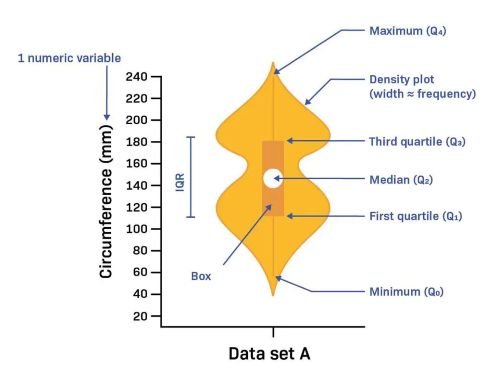

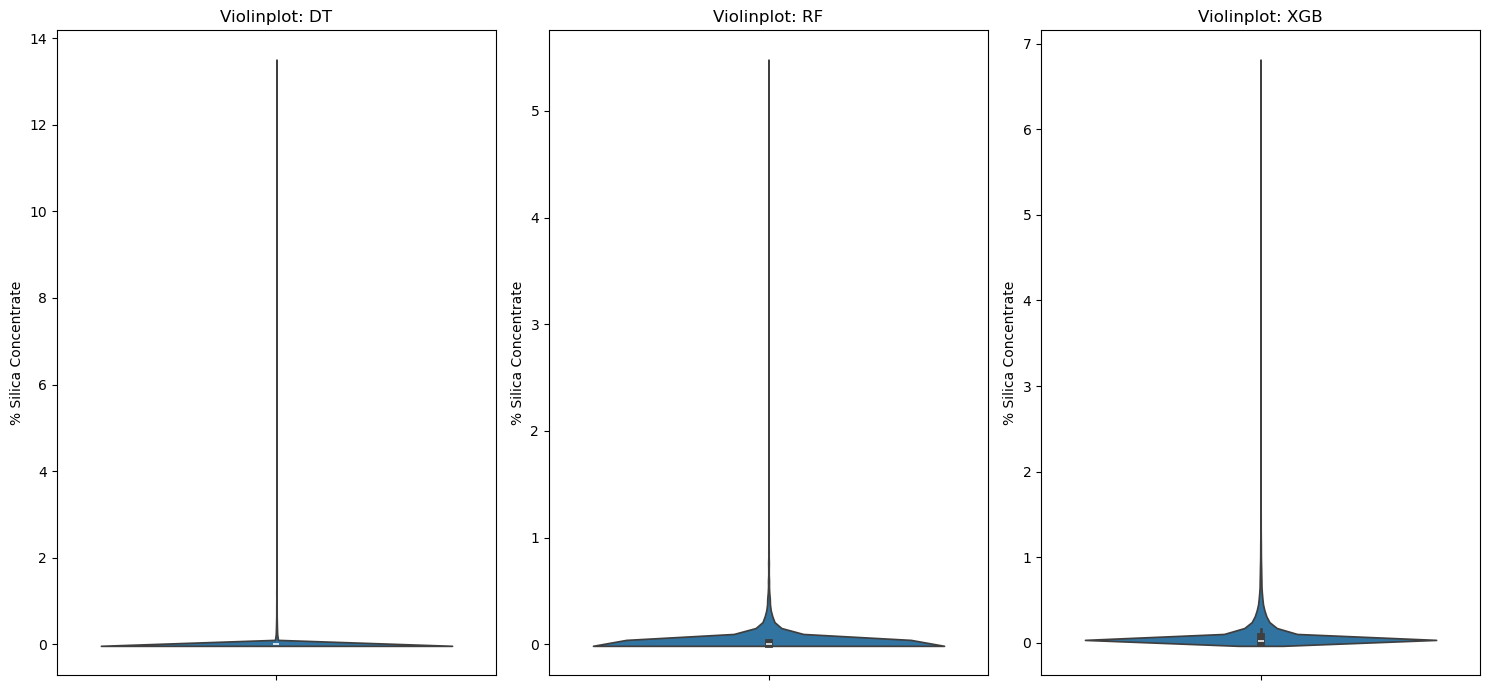

In [150]:
#Violinplot para visualizar la distribuci√≥n de los errores de los modelos
#Calcular errores cuadrados para los mejores modelos
squared_errors_DT = (y_test - y_pred_DT) ** 2
squared_errors_RF = (y_test - y_pred_RF) ** 2
squared_errors_XGB = (y_test - y_pred_XGB) ** 2

# Diccionario que mapea el nombre del modelo con la variable que guarda su error asociado
squared_errors_models = { 
    'DT':squared_errors_DT,
    'RF':squared_errors_RF,
    'XGB':squared_errors_XGB
}

#Crear subplots
fig, axs = plt.subplots(1, len(squared_errors_models), figsize = (15,7))

#Bucle para gr√°ficar
for i, (modelo, errores) in enumerate(squared_errors_models.items()):
        ax = axs[i]
        ax.set_title("Violinplot: " + f'{modelo}')
        sns.violinplot(y= errores, ax=ax) #Usamos y=errores para gr√°fica verticalmente

plt.tight_layout()
plt.show() 

**Interpretaci√≥n de la distribuci√≥n del error en las predicciones**

Cada gr√°fico representa la distribuci√≥n del **"% Slice Correctness"**, es decir, qu√© tan cerca estuvo cada modelo de predecir correctamente el porcentaje de s√≠lice en cada muestra. Analizaremos modelo por modelo:

#### 1. Decision Tree (DT)
- **Rango amplio de errores**, se observa que el eje vertical llega hasta ~14, lo que indica que este modelo tiene predicciones con errores bastante altos.
- **Distribuci√≥n dispersa**, lo que se ve reflejado en la forma del viol√≠n, la que indica que hay una mayor dispersi√≥n en los datos, con varios outliers.

*Conclusi√≥n:* Aunque puede capturar patrones simples, su falta de generalizaci√≥n lo hace menos confiable para procesos industriales donde la precisi√≥n es cr√≠tica.

#### 2. Random Forest (RF)
- **Rango m√°s estrecho (~0‚Äì5)**, esto indica mayor estabilidad en las predicciones.
- **Distribuci√≥n m√°s concentrada**, se osberva que la mayor√≠a de los valores est√°n agrupados cerca del eje inferior, lo que sugiere menor error promedio.

*Conclusi√≥n:* Este modelo parece ser m√°s robusto y consistente, lo cual es ideal para ambientes industriales con variabilidad controlada.

#### 3. XGBoost (XGB)
- **Rango intermedio (~0‚Äì7)**, este modelo tiene m√°s dispersi√≥n que RF pero menos que DT.
- **Distribuci√≥n bimodal o con picos**, este modelo puede estar capturando relaciones m√°s complejas, pero tambi√©n introduce cierta variabilidad.

*Conclusi√≥n:* Potente en t√©rminos de modelado, pero podr√≠a requerir ajustes para evitar sobreajuste o errores extremos.

### Cuantificaci√≥n de los *errores cuadrados* por rangos intercuartilicos (medir frecuencia de errores por rangos)

Cuantificar los errores por rangos intercuart√≠licos (IQR, Interquartile Range) es √∫til porque el IQR nos da una medida robusta de la dispersi√≥n de los datos, y aplicarlo a los errores (residuales de un modelo, diferencias de medici√≥n) nos permite entender mejor c√≥mo se distribuyen y detectar anomal√≠as.

**1. Robustez frente a valores at√≠picos**
- La desviaci√≥n est√°ndar y la varianza se ven muy afectadas por outliers.
- El rango intercuart√≠lico (Q3 ‚Äì Q1) se concentra en el 50% central de los datos, por lo que no se distorsiona si hay errores extremos.

*Esto ayuda a tener una visi√≥n realista de qu√© tan grandes son los errores "normales"*.

**2. Comparabilidad entre conjuntos de datos o modelos**

Si comparamos errores de distintos procesos o modelos, el IQR te permite evaluar *cu√°l produce errores m√°s concentrados y consistentes*, sin que la comparaci√≥n se vea afectada por pocos casos extremos.


Entonces, al cuantificar errores por IQR, se puede expresar:

- **Mediana:** error t√≠pico.
- **IQR:** variabilidad de los errores centrales.
- **Outliers detectados:** errores excepcionales.

Esto es mucho m√°s interpretativo que solo dar promedio de los errores por modelo.

In [180]:
#Calculo de los cuartiles 

for i, (modelo, errores) in enumerate(squared_errors_models.items()):
    q1 = np.percentile(errores, 25)
    q2 = np.percentile(errores, 50)
    q3 = np.percentile(errores, 75)
    iqr = q3 - q1

    print(f"Rangos intercuartlicos para el modelo {modelo}")
    print(f"El valor del error del primer cuartil (percentil 25) es igual a: {q1}")
    print(f"El valor del error del segundo cuartil (percentil 50) es igual a: {q2}")
    print(f"El valor del error del tercer cuartil (percentil 75) es igual a: {q3}")
    print(f"El rango intercuartil del valor de los errores es igual a: {iqr}\n")

Rangos intercuartlicos para el modelo DT
El valor del error del primer cuartil (percentil 25) es igual a: 0.0
El valor del error del segundo cuartil (percentil 50) es igual a: 7.888609052210118e-31
El valor del error del tercer cuartil (percentil 75) es igual a: 1.262177448353619e-29
El rango intercuartil del valor de los errores es igual a: 1.262177448353619e-29

Rangos intercuartlicos para el modelo RF
El valor del error del primer cuartil (percentil 25) es igual a: 0.00038447775108659595
El valor del error del segundo cuartil (percentil 50) es igual a: 0.0030043940248568966
El valor del error del tercer cuartil (percentil 75) es igual a: 0.014751308029582513
El rango intercuartil del valor de los errores es igual a: 0.014366830278495918

Rangos intercuartlicos para el modelo XGB
El valor del error del primer cuartil (percentil 25) es igual a: 0.0034934219394134763
El valor del error del segundo cuartil (percentil 50) es igual a: 0.018674874884766268
El valor del error del tercer cua

In [183]:
#Calculo del limite inferior y superior para identificar outliers
for i, (modelo, errores) in enumerate(squared_errors_models.items()):
    
    limite_inferior = max(q1 - 1.5 * iqr, errores[errores > (q1 - 1.5 * iqr)].min())
    limite_superior = min(q3 + 1.5 * iqr, errores[errores < (q3 + 1.5 * iqr)].max())

    print(f"Modelo {modelo}")
    print(f"L√≠mite inferior es igual a: {limite_inferior}")
    print(f"L√≠mite superior es igual a: {limite_superior}\n")

Modelo DT
L√≠mite inferior es igual a: 0.0
L√≠mite superior es igual a: 0.16269179590286512

Modelo RF
L√≠mite inferior es igual a: 4.738095811983702e-29
L√≠mite superior es igual a: 0.16381495527539908

Modelo XGB
L√≠mite inferior es igual a: 4.71482053667426e-13
L√≠mite superior es igual a: 0.16382064331521407



In [219]:
#Identificacion de errores por rangos

results = [] #Lista para guardar resultados

for i, (modelo, errores) in enumerate(squared_errors_models.items()):

    error_debajo_liminf = errores[errores < limite_inferior]                # Erorres atipicos en rangos bajos ( < limite inferior)
    error_liminf_q1 = errores[(errores > limite_inferior) & (errores < q1)] # Erorres entre lim inferior y Q1
    error_q1_q2 = errores[(errores > q1) & (errores < q2)]                  # Erorres entre Q1 y Q2
    error_zero = errores[(errores == 0)]                                    # Erorres == 0 (Predicciones perfectas)
    error_q2_q3 = errores[(errores > q2) & (errores < q3)]                  # Erorres entre Q2 y Q3
    error_q3_limsup = errores[(errores > q3) & (errores < limite_superior)] # Erorres entre Q3 y Lim superior
    error_encima_limsup = errores[errores > limite_superior]                # Erorres at√≠picos en rangos altos ( > Lim superior)

    print(f"Errores cu√°draticos (SE) por rangos para el modelo {modelo}")
    print(f"SE < lim inf: {len(error_debajo_liminf)}")
    print(f"lim inf < SE < Q1: {len(error_liminf_q1)}")
    print(f"Q1 < SE < Q2: {len(error_q1_q2)}")
    print(f"SE = 0, predicciones perfectas: {len(error_zero)}")
    print(f"Q2 < SE < Q3: {len(error_q2_q3)}")
    print(f"Q3 < SE < lim sup: {len(error_q3_limsup)}")
    print(f"SE > lim sup: {len(error_encima_limsup)}\n")

    #Guardar resultados en una lista de diccionarios
    results.append({
        'models': modelo,
        'SE < lim inf': len(error_debajo_liminf),
        'lim inf < SE < Q1': len(error_liminf_q1),
        'Q1 < SE < Q2': len(error_q1_q2),
        'SE = 0': len(error_zero),
        'Q2 < SE < Q3': len(error_q2_q3),
        'Q3 < SE < lim sup':len(error_q3_limsup),
        'SE > lim sup': len(error_encima_limsup)
    })

#Crear Dataframe con todos los resultados
df_errors_results = pd.DataFrame(results)

#Crear tabla pivot
pivot = pd.pivot_table(df_errors_results, 
                       values = ['SE < lim inf',
                                'lim inf < SE < Q1',
                                'Q1 < SE < Q2',
                                'SE = 0',
                                'Q2 < SE < Q3',
                                'Q3 < SE < lim sup',
                                'SE > lim sup'],
                       index='models', 
                       aggfunc=np.sum) # Contar el n√∫mero de errores por rango

pivot = np.round(pivot,2)

Errores cu√°draticos (SE) por rangos para el modelo DT
SE < lim inf: 111621
lim inf < SE < Q1: 9220
Q1 < SE < Q2: 425
SE = 0, predicciones perfectas: 33118
Q2 < SE < Q3: 383
Q3 < SE < lim sup: 286
SE > lim sup: 974

Errores cu√°draticos (SE) por rangos para el modelo RF
SE < lim inf: 5
lim inf < SE < Q1: 64218
Q1 < SE < Q2: 32148
SE = 0, predicciones perfectas: 0
Q2 < SE < Q3: 17587
Q3 < SE < lim sup: 6185
SE > lim sup: 2766

Errores cu√°draticos (SE) por rangos para el modelo XGB
SE < lim inf: 0
lim inf < SE < Q1: 30726
Q1 < SE < Q2: 30726
SE = 0, predicciones perfectas: 0
Q2 < SE < Q3: 30726
Q3 < SE < lim sup: 16602
SE > lim sup: 14124



C:\Users\THINKBOOK\AppData\Local\Temp\ipykernel_9584\3227055261.py:40: FutureWarning: The provided callable <function sum at 0x000001FFC28DA200> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(df_errors_results,


In [229]:
orden_cols = [
    'SE < limite inferior',
    'lim inf < SE < Q1',
    'Q1 < SE < Q2',
    'SE = 0',
    'Q2 < SE < Q3',
    'Q3 < SE < lim sup',
    'SE > lim sup',
]

pivot = pivot.reindex(columns=orden_cols)
pivot.sort_values(by=['SE = 0'], ascending = False)

# Mostrar con cuadr√≠culas completas
pivot.style.set_table_styles(
    [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]
).set_properties(**{'border': '1px solid black'})

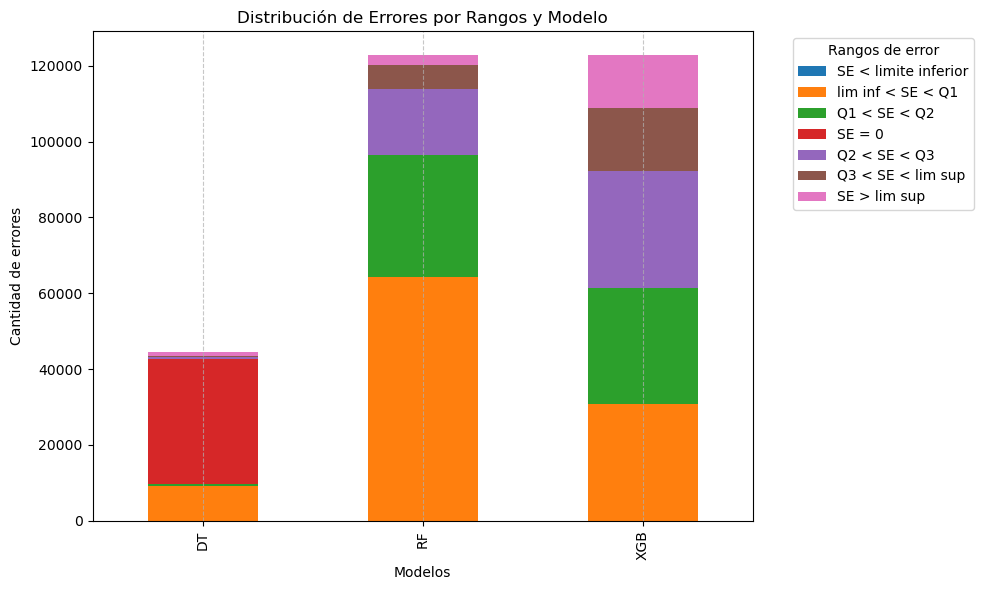

In [230]:
#Visualizar errores por rangos y modelo

# Crear gr√°fico de barras apiladas
pivot.plot(kind='bar', stacked=True, figsize=(10,6))

# Agregar cuadr√≠cula vertical
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title("Distribuci√≥n de Errores por Rangos y Modelo")
plt.ylabel("Cantidad de errores")
plt.xlabel("Modelos")
plt.legend(title="Rangos de error", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### ¬øQu√© variables tienen m√°s impacto en la predicci√≥n de impurezas? Evaluaci√≥n del impacto de cada variable usando feature importance

Text(0, 0.5, 'Variables')

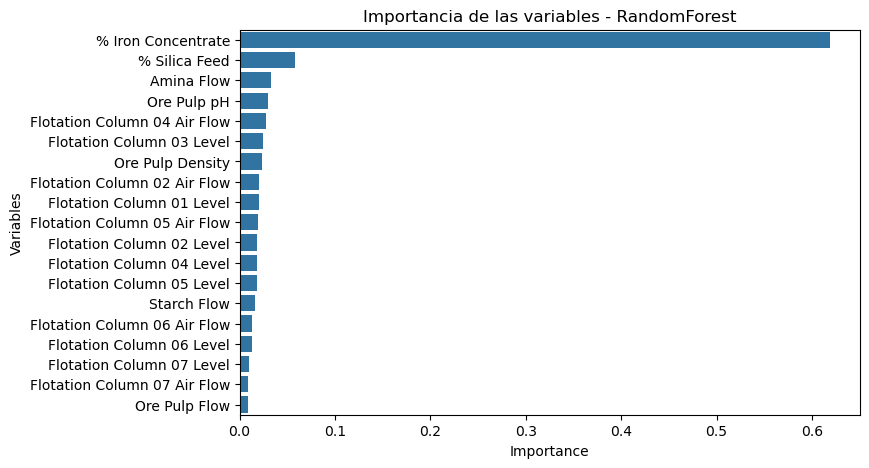

In [233]:
import pandas as pd
import seaborn as sns

X_resampled = df.drop(columns=['% Silica Concentrate', 'date'])

importances = model_RF.feature_importances_
feat_imp = pd.Series(importances, index=X_resampled.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Importancia de las variables - RandomForest")
plt.xlabel('Importance')
plt.ylabel('Variables')

La gr√°fica de importancia de variables del modelo **Random Forest** revela que la variable *"% Iron Concentrate"* tiene el mayor peso en la predicci√≥n del proceso de recuperaci√≥n de s√≠lice, seguido del *Amina Flow*. Esta influencia puede explicarse desde una perspectiva tanto mineral√≥gica como operacional:

**1. Relaci√≥n inversa entre hierro y s√≠lice**

En procesos de flotaci√≥n diferencial, como los utilizados en la separaci√≥n de hierro y s√≠lice, existe una competencia directa entre ambas especies minerales. *A medida que se incrementa la concentraci√≥n de hierro en el concentrado, es com√∫n que la recuperaci√≥n de s√≠lice disminuya*, ya que el proceso est√° dise√±ado para **favorecer la selectividad del hierro**. Por tanto, el contenido de hierro act√∫a como un indicador **indirecto del grado de separaci√≥n logrado.**

**2. Indicador de eficiencia del proceso**

La concentraci√≥n de hierro en el producto final refleja la **eficiencia del circuito de flotaci√≥n**, especialmente en columnas donde se aplican reactivos como *amina y almid√≥n*. Un alto contenido de hierro puede implicar que el proceso est√° funcionando correctamente para rechazar s√≠lice, mientras que desviaciones en esta variable pueden alertar sobre **problemas de selectividad, dosificaci√≥n de reactivos o condiciones de operaci√≥n.**

**3. Sensibilidad del modelo**

Desde el punto de vista del modelo de Random Forest, la variable *% Iron Concentrate* presenta una **alta capacidad discriminativa**, es decir, permite al algoritmo separar con claridad los distintos niveles de recuperaci√≥n de s√≠lice.

## Conclusiones 

A partir del an√°lisis visual mediante violinplots y la segmentaci√≥n estad√≠stica por rangos intercuart√≠licos, se concluye que el modelo **Random Forest** ofrece el mejor desempe√±o en t√©rminos de **estabilidad y control de errores**, lo que lo convierte en el candidato m√°s adecuado para aplicaciones industriales como la recuperaci√≥n de s√≠lice (impureza, que se desea separar). Su **distribuci√≥n de errores es m√°s estrecha y menos dispersa**, lo que se traduce en mayor confiabilidad operativa y menor riesgo de desviaciones cr√≠ticas.

El modelo **XGBoost**, aunque presenta una capacidad superior para capturar relaciones no lineales, muestra una **variabilidad m√°s amplia en sus errores**, lo que requiere una evaluaci√≥n cuidadosa de su tolerancia en entornos productivos. Por su parte, **Decision Tree**, si bien √∫til como referencia base, exhibe una dispersi√≥n significativa que lo hace menos recomendable para procesos donde la precisi√≥n y la consistencia son fundamentales.

El an√°lisis por cuartiles ha demostrado ser una herramienta clave para identificar si los errores son **excepcionales o recurrentes**, permitiendo una comparaci√≥n m√°s robusta entre modelos. En contextos industriales, donde los errores extremos pueden comprometer la calidad del producto y la eficiencia del proceso, un RIQ estrecho y cuartiles bajos son indicadores de un modelo confiable y aplicable en planta.

Finalmente, se destaca que variables altamente correlacionadas como **% Fe** y **% SiO‚ÇÇ** en el concentrado deben ser tratadas con criterio. Aunque **Random Forest** maneja bien la multicolinealidad, excluir **% Fe** puede ser estrat√©gico si el objetivo es identificar variables operativas con impacto directo en la recuperaci√≥n de s√≠lice, como el pH de la pulpa, el flujo de reactivos o las condiciones de las columnas de flotaci√≥n.